# O que vende um carro?

Você é analista na Lista de Eixo de Manivela. Centenas de propagandas gratuitas de veículos são publicadas no seu site todos os dias. Você precisa estudar os dados coletados nos últimos anos e determinar quais fatores influenciaram o preço de um veículo.

Existem alguns fatores que podem influenciar a venda:

Marca e reputação: A marca de um carro e sua reputação no mercado são fatores importantes. Marcas conhecidas por sua qualidade, confiabilidade e durabilidade tendem a atrair mais compradores.

Design e estilo: O design e o estilo do carro desempenham um papel crucial na decisão de compra dos consumidores. Carros com um design atraente e moderno têm maior probabilidade de atrair a atenção dos clientes e tem um valor maior devido a alta demanda.

Quilometragem: A quilometragem do veículo é um fator importante para carros usados. Carros com menor quilometragem tendem a ser mais valorizados, pois são percebidos como tendo menor desgaste.

Ano do modelo: O ano do modelo do carro também pode influenciar a decisão de compra de um carro usado. Alguns compradores preferem carros mais recentes, enquanto outros buscam modelos mais antigos com preços mais acessíveis.

Conforto e recursos: Compradores valorizam carros que oferecem conforto e comodidade, como assentos confortáveis, espaço interno adequado, sistema de entretenimento avançado e recursos de segurança.

Preço competitivo: O preço é um fator-chave na venda de carros usados e seminovos. Os preços competitivos e razoáveis têm maior probabilidade de atrair compradores.

Campanhas de marketing: Campanhas de marketing eficazes podem impactar significativamente a percepção do público sobre um carro e levar a um aumento nas vendas.

## Iniciação

In [212]:
import pandas as pd

vehicles = pd.read_csv('/datasets/vehicles_us.csv')
                       

### Carregue dados

Visualizando as informações gerais:

In [213]:
vehicles.info()      

print(vehicles)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB
       price  model_year           model  condition  cylinders fuel  odometer  \
0       9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1      25500         N

### Explore os dados iniciais

O conjunto de dados contém os seguintes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel etc.
- `odometer` — a quilometragem do veículo quando a propaganda foi publicada 
- `transmission`
- `paint_color`
- `is_4wd` — Se o veículo é 4 por 4 (tipo Booleano)
- `date_posted` — a data que a propaganda foi publicada
- `days_listed` — dias desde a publicação até a retirada


Visualizando a amostragem dos dados:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='price', ylabel='model'>

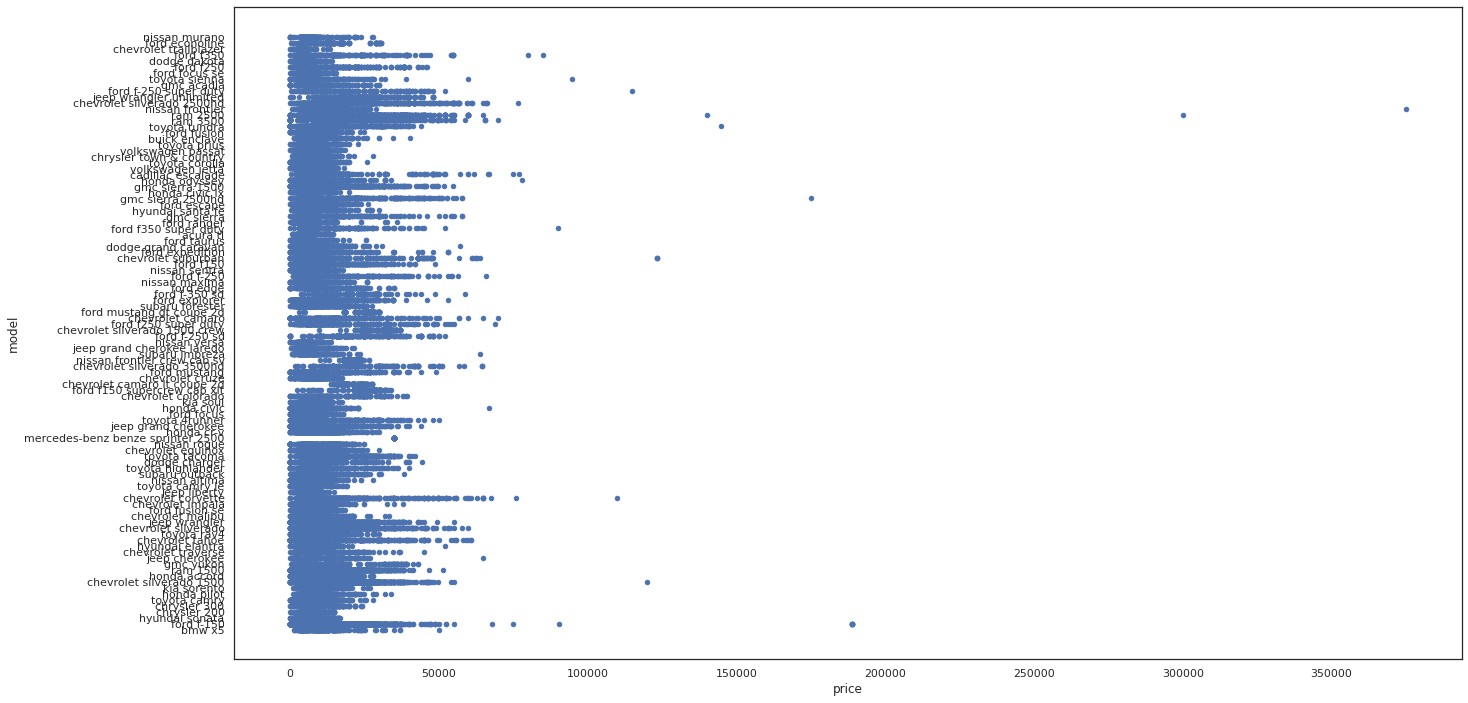

In [214]:
vehicles.plot.scatter(x='price', y='model', figsize=(22,12))


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='model_year', ylabel='price'>

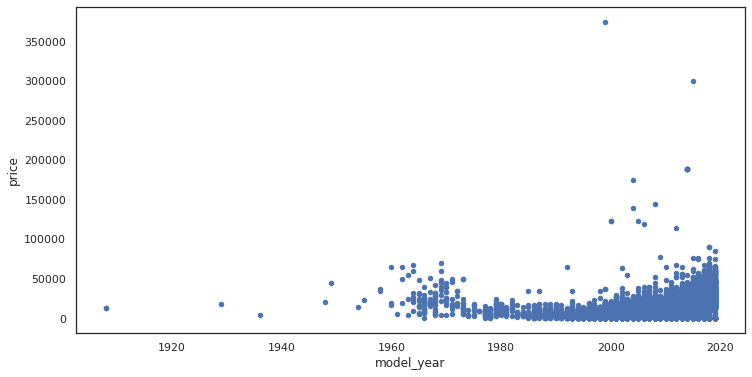

In [215]:
vehicles.plot.scatter(x='model_year', y='price', figsize=(12,6))


Quando analisamos pelo gráfico acima, notamos que a maioria dos veículos estão entre 0 a 50000 que é uma margem alta e que todas os tipo de veículos tem valores próximos ou em 0 e isso é um ponto que precisamos analisar e corrigir as informações incorretas para prosseguir com nossa análise. 

Sobre os valores superiores precisamos entender cada veículo para entender se é um valor 'normal' ou não. 

Outro ponto que podemos notar é que temos uma alta quantidade de veículos acima dos anos 2000 que estão com valores baixos e precisamos entender se há algum motivo ou se é um erro de valores ausentes. 

In [216]:
vehicles['model_year'].unique()

array([2011.,   nan, 2013., 2003., 2017., 2014., 2015., 2012., 2008.,
       2018., 2009., 2010., 2007., 2004., 2005., 2001., 2006., 1966.,
       1994., 2019., 2000., 2016., 1993., 1999., 1997., 2002., 1981.,
       1995., 1996., 1975., 1998., 1985., 1977., 1987., 1974., 1990.,
       1992., 1991., 1972., 1967., 1988., 1969., 1989., 1978., 1965.,
       1979., 1968., 1986., 1980., 1964., 1963., 1984., 1982., 1973.,
       1970., 1955., 1971., 1976., 1983., 1954., 1962., 1948., 1960.,
       1908., 1961., 1936., 1949., 1958., 1929.])

In [217]:
vehicles['model_year'].head(50)

0     2011.0
1        NaN
2     2013.0
3     2003.0
4     2017.0
5     2014.0
6     2015.0
7     2013.0
8     2012.0
9     2008.0
10    2011.0
11    2012.0
12    2012.0
13    2018.0
14    2009.0
15    2013.0
16    2010.0
17    2014.0
18    2013.0
19    2018.0
20       NaN
21    2007.0
22    2004.0
23    2004.0
24    2009.0
25    2017.0
26    2014.0
27    2015.0
28    2012.0
29    2010.0
30    2009.0
31    2017.0
32    2015.0
33    2011.0
34    2008.0
35    2015.0
36    2013.0
37    2005.0
38    2015.0
39    2009.0
40    2017.0
41    2017.0
42    2013.0
43    2008.0
44    2004.0
45    2001.0
46    2015.0
47    2008.0
48    2014.0
49    2006.0
Name: model_year, dtype: float64

Temos valores em 'NAN' em 'model_year', podemos categorizar com outras colunas como 'condition', 'model' e 'odometer' price para preencher os valores ausentes. 

In [218]:
vehicles['model'].value_counts()

ford f-150                           2796
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
ford f-250 super duty                 241
acura tl                              236
kia sorento                           236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: model, Length: 100, dtype: int64

In [219]:
vehicles['model'].unique()

array(['bmw x5', 'ford f-150', 'hyundai sonata', 'chrysler 200',
       'chrysler 300', 'toyota camry', 'honda pilot', 'kia sorento',
       'chevrolet silverado 1500', 'honda accord', 'ram 1500',
       'gmc yukon', 'jeep cherokee', 'chevrolet traverse',
       'hyundai elantra', 'chevrolet tahoe', 'toyota rav4',
       'chevrolet silverado', 'jeep wrangler', 'chevrolet malibu',
       'ford fusion se', 'chevrolet impala', 'chevrolet corvette',
       'jeep liberty', 'toyota camry le', 'nissan altima',
       'subaru outback', 'toyota highlander', 'dodge charger',
       'toyota tacoma', 'chevrolet equinox', 'nissan rogue',
       'mercedes-benz benze sprinter 2500', 'honda cr-v',
       'jeep grand cherokee', 'toyota 4runner', 'ford focus',
       'honda civic', 'kia soul', 'chevrolet colorado',
       'ford f150 supercrew cab xlt', 'chevrolet camaro lt coupe 2d',
       'chevrolet cruze', 'ford mustang', 'chevrolet silverado 3500hd',
       'nissan frontier crew cab sv', 'subaru imp

In [220]:
vehicles['model'].isna().sum()

0

In [221]:
vehicles['model'].unique()

array(['bmw x5', 'ford f-150', 'hyundai sonata', 'chrysler 200',
       'chrysler 300', 'toyota camry', 'honda pilot', 'kia sorento',
       'chevrolet silverado 1500', 'honda accord', 'ram 1500',
       'gmc yukon', 'jeep cherokee', 'chevrolet traverse',
       'hyundai elantra', 'chevrolet tahoe', 'toyota rav4',
       'chevrolet silverado', 'jeep wrangler', 'chevrolet malibu',
       'ford fusion se', 'chevrolet impala', 'chevrolet corvette',
       'jeep liberty', 'toyota camry le', 'nissan altima',
       'subaru outback', 'toyota highlander', 'dodge charger',
       'toyota tacoma', 'chevrolet equinox', 'nissan rogue',
       'mercedes-benz benze sprinter 2500', 'honda cr-v',
       'jeep grand cherokee', 'toyota 4runner', 'ford focus',
       'honda civic', 'kia soul', 'chevrolet colorado',
       'ford f150 supercrew cab xlt', 'chevrolet camaro lt coupe 2d',
       'chevrolet cruze', 'ford mustang', 'chevrolet silverado 3500hd',
       'nissan frontier crew cab sv', 'subaru imp

Não há valores ausentes na coluna 'model' que é um bom indicativo para preenchermos valores ausentes em outras colunas.

In [222]:
vehicles['condition'].value_counts()

excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

In [223]:
vehicles['transmission'].value_counts()

automatic    46902
manual        2829
other         1794
Name: transmission, dtype: int64

In [224]:
vehicles['fuel'].value_counts()

gas         47288
diesel       3714
hybrid        409
other         108
electric        6
Name: fuel, dtype: int64

Temos valores em 'other' nas colunas 'transmission' e 'fuel'. Mantemos as informações desta forma? Podemos preencher ou classificá-los?

In [225]:
vehicles['cylinders'].value_counts()

8.0     15844
6.0     15700
4.0     13864
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64

In [226]:
vehicles['odometer'].value_counts()

0.0         185
140000.0    183
120000.0    179
130000.0    178
160000.0    167
           ... 
280499.0      1
49814.0       1
194920.0      1
140800.0      1
269527.0      1
Name: odometer, Length: 17762, dtype: int64

Existem 185 carros com a quilometragem em 0,0km, podemos acreditar que esses carros são novos e nunca foram utilizados? 

In [227]:
 vehicles['date_posted'].isna().sum()

0

In [228]:
 vehicles['days_listed'].isna().sum()

0

In [229]:
vehicles['price'].value_counts()

1        798
6995     719
5995     655
4995     624
3500     620
        ... 
37873      1
6197       1
25647      1
3138       1
340        1
Name: price, Length: 3443, dtype: int64

In [230]:
vehicles['price'].head(50)

0      9400
1     25500
2      5500
3      1500
4     14900
5     14990
6     12990
7     15990
8     11500
9      9200
10    19500
11     8990
12    18990
13    16500
14    12990
15    17990
16    14990
17    13990
18    12500
19    13990
20     6990
21     5250
22     7500
23     7500
24     3950
25    11499
26     8499
27    12999
28    29800
29     5495
30     5000
31    11999
32     9499
33     3890
34     9500
35    14999
36    10499
37     7500
38     7999
39     8000
40    11499
41    11995
42    34900
43     5100
44     4500
45     2400
46    11200
47    12500
48     9500
49     3200
Name: price, dtype: int64

In [231]:
vehicles['price'].tail(50)

51475    17980
51476    16900
51477     6499
51478     6299
51479     5899
51480     6999
51481     7300
51482    13900
51483     6499
51484     7999
51485     4595
51486     5895
51487     1495
51488    21900
51489     1200
51490     2750
51491    26500
51492    10950
51493     9450
51494     7999
51495     9500
51496     4999
51497     2995
51498    15900
51499     9990
51500     6995
51501     8995
51502     7995
51503     6595
51504    20481
51505     2000
51506    28900
51507    29500
51508     4950
51509     5980
51510     4200
51511    21600
51512     7300
51513    17999
51514     4800
51515    12000
51516     8999
51517    11000
51518     3750
51519    11750
51520     9249
51521     2700
51522     3950
51523     7455
51524     6300
Name: price, dtype: int64

In [232]:
vehicles['paint_color'].value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

Podemos considerar a cor 'custom' como uma cor personalizada pelo antigo dono, e também contém valores ausentes. 

In [233]:
vehicles['days_listed'].value_counts()

18     959
24     950
22     945
19     941
20     934
      ... 
199      1
261      1
217      1
228      1
223      1
Name: days_listed, Length: 227, dtype: int64

Existem valores ausentes em quase todas colunas, em algumas colunas os motivos são 'plausíveis' devido sua finalidade de informação mas em outras são erros de preenchimento que precisão ser corrigidos. 

Existem valores ausentes em todas as colunas, e algumas colunas contêm mais valores ausentes do que outras. As colunas com mais valores ausentes são "model_year", "cylinders", "odometer", "paint_color" e "is_4wd", indicando que essas informações podem não estar disponíveis para algumas das entradas. No geral, a quantidade de dados ausentes pode impactar a análise dos dados e requer atenção ao realizar análises estatísticas ou modelagem.

<AxesSubplot:title={'center':'price'}, xlabel='[type]'>

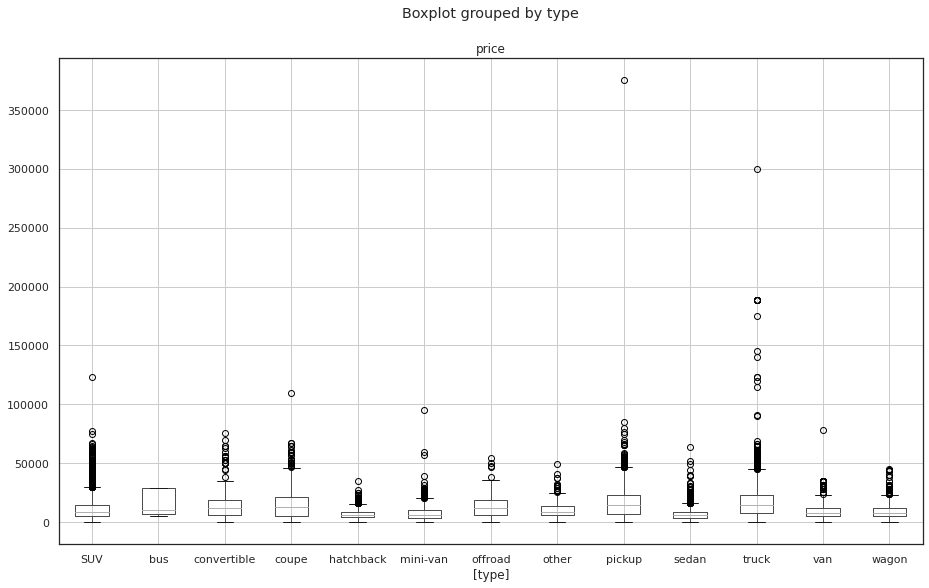

In [234]:
data_to_plot = vehicles[['price', 'type']]


data_to_plot.boxplot(by=['type'], column='price', figsize=(15, 9))


<AxesSubplot:title={'center':'price'}, xlabel='[days_listed]'>

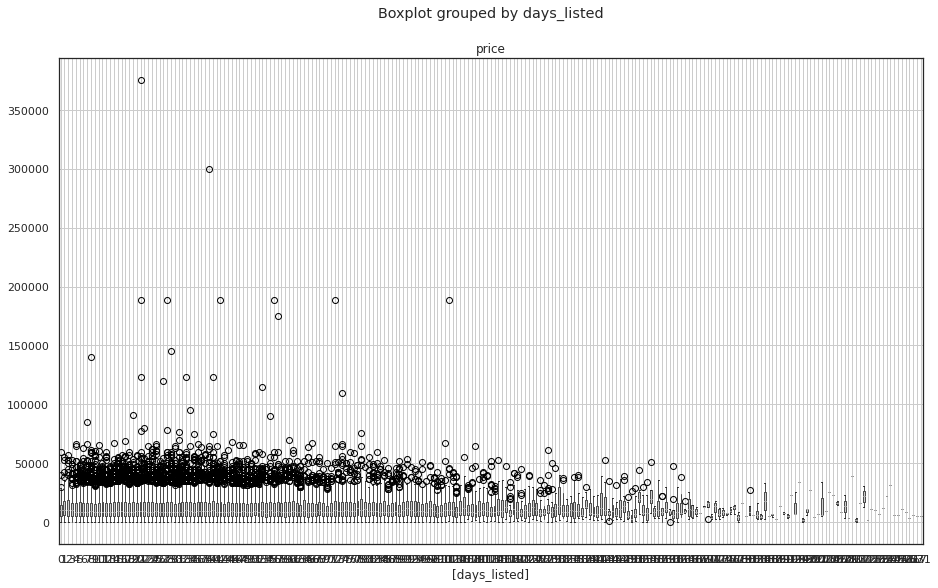

In [235]:
data_to_plot2 = vehicles[['price', 'days_listed']]


data_to_plot2.boxplot(by=['days_listed'], column='price', figsize=(15, 9))


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='days_listed', ylabel='price'>

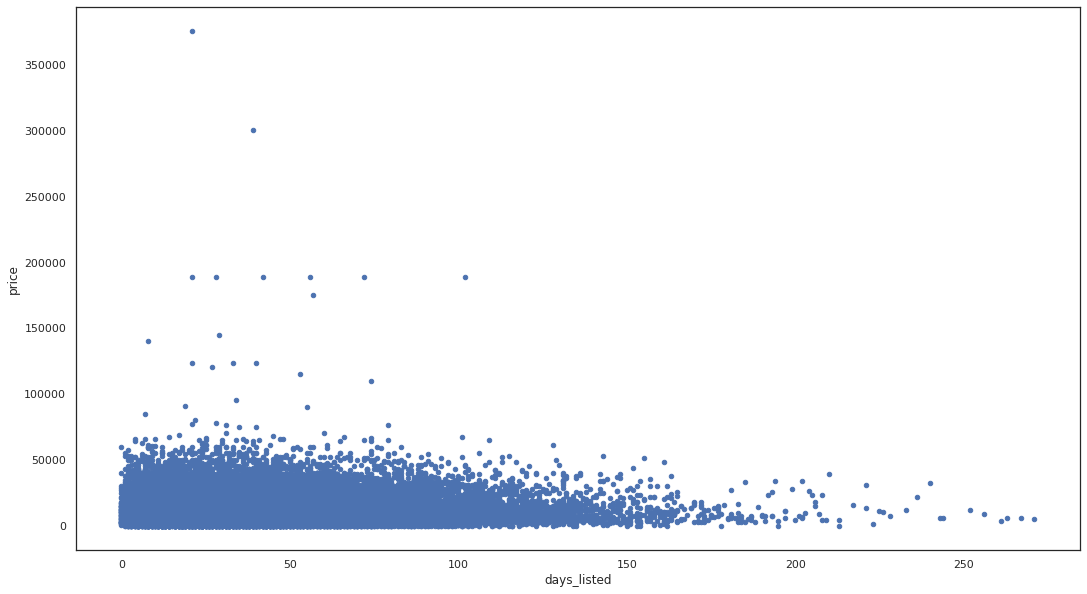

In [236]:
vehicles.plot.scatter(x='days_listed', y='price', figsize=(18,10))

Por este gráfico podemos analisar que a grande maioria dos veículos foram listados entre 0 a 100 dias, e temos somente um veículo acima dos $150,000 acima de 100 dias listado, aparentemente não há relação ou impacto do preço com o tempo de listagem. 

In [237]:
prices = vehicles.query('price < 1000')

print(prices.head(50))

      price  model_year                     model  condition  cylinders  \
218     500      2004.0            toyota corolla   like new        4.0   
317     600      1999.0           toyota camry le    salvage        4.0   
332     500      2004.0            toyota corolla   like new        4.0   
405       1      2014.0          chevrolet camaro  excellent        6.0   
406     288      2018.0             nissan altima  excellent        4.0   
408     700      2000.0                ford focus       fair        4.0   
632     299      2004.0              toyota camry  excellent        4.0   
686     999      1995.0            toyota 4runner    salvage        6.0   
720     500      2004.0            toyota corolla   like new        4.0   
791     600      2007.0               ford fusion       fair        4.0   
844     111      2003.0              ford mustang       good        8.0   
1047    850      2008.0            subaru impreza       fair        4.0   
1063    950      1998.0  

Algo que pode ser explorado mais a frente, precismos entender o motivo de alguns veículos serem tão baratos e um ponto interessante notar é a grande maioria serem modelos de 1990 a 2010. O que pode ser concluído? será que é algo normal em alguns veículos e para outros houve um erro de digitação? podemos utilizar a condição com a quilometragêm para corrigir os valores que indetificamos como um erro de digitação? 

In [238]:
prices_high = vehicles.query('price > 100000')

print(prices_high.head(50))

        price  model_year                     model  condition  cylinders  \
1309   189000      2014.0                ford f-150       good        6.0   
1668   189000      2014.0                ford f-150       good        6.0   
11359  300000      2015.0                  ram 2500  excellent        NaN   
12504  375000      1999.0           nissan frontier       good        6.0   
20700  109999         NaN        chevrolet corvette        new        8.0   
22833  115000      2012.0     ford f-250 super duty       good        8.0   
24999  140000      2004.0                  ram 2500       good        6.0   
27375  189000      2014.0                ford f-150       good        6.0   
29810  123456      2000.0        chevrolet suburban       good        8.0   
30634  189000      2014.0                ford f-150       good        6.0   
33434  189000      2014.0                ford f-150       good        6.0   
34206  175000      2004.0         gmc sierra 2500hd       good        8.0   

In [239]:
prices_high['condition'].value_counts()

good         13
new           1
excellent     1
fair          1
like new      1
Name: condition, dtype: int64

Analisando as duas fatais na coluna 'price' abaixo de 1.000, e valores acima de 100.000 podemos analisar que são veículos variados em todos os sentidos. Sobre os valores baixos, obviamente são um erro de preenchimento de dados na maioria dos casos, pois há uma faixa de veículo entre 1993 e 2018, há uma variação alta entre as condições dos veículos e o odômetro é variado.

### Conclusões e próximos passos


Com base nos dados iniciais apresentados, algumas observações podem ser feitas:

Valores Ausentes: Há várias colunas com valores ausentes, como "model_year", "cylinders" e "odometer" que precisam ser tratados, há valores ausentes nas colunas 'paint_color' e 'is_4wd' que não há base ou padrão para serem preenchidos.

Algumas informações podem não estar disponíveis para todas as entradas, o que pode afetar a análise.

Para prosseguir com a análise, os próximos passos podem incluir:

Tratamento de Valores Ausentes: Lidar com os valores ausentes nas colunas relevantes. Isso pode ser feito por meio de técnicas como preenchimento com médias ou medianas, usando técnicas de imputação, ou removendo as entradas com valores ausentes se a quantidade for pequena.

Análise Exploratória de Dados: Realizar análises exploratórias para entender melhor a distribuição dos preços, modelos de veículos e condições. Gráficos como histogramas, gráficos de barras e boxplots podem ser úteis nessa etapa.

Identificação e Tratamento de Outliers: Verificar a existência de outliers nos dados de preço e decidir se eles devem ser tratados ou não, dependendo do contexto da análise.

Ao realizar esses passos, será possível obter insights mais detalhados sobre os dados e garantir que eles estejam adequados para a análise requisitada.

## Cuide dos valores ausentes (se houver algum)

Vamos analisar algumas colunas com  valores ausentes para entender melhor quais colunas podem ser preenchidas.

In [240]:
vehicles['odometer'].head(50)

0     145000.0
1      88705.0
2     110000.0
3          NaN
4      80903.0
5      57954.0
6      79212.0
7     109473.0
8     104174.0
9     147191.0
10    128413.0
11    111142.0
12    140742.0
13     22104.0
14    132285.0
15         NaN
16    130725.0
17    100669.0
18    128325.0
19     31932.0
20    147485.0
21    154000.0
22    180000.0
23         NaN
24         NaN
25         NaN
26     79523.0
27     39368.0
28     57413.0
29         NaN
30    137273.0
31     35721.0
32     51848.0
33    300000.0
34    149799.0
35     63037.0
36     88042.0
37    160000.0
38         NaN
39    234000.0
40     54772.0
41         NaN
42         NaN
43    188000.0
44    168821.0
45    277564.0
46     90302.0
47    141098.0
48     46000.0
49    255390.0
Name: odometer, dtype: float64

In [241]:
odometer = vehicles[vehicles['odometer'].isna()]
print(odometer.head(50))

     price  model_year                              model  condition  \
3     1500      2003.0                         ford f-150       fair   
15   17990      2013.0                           ram 1500  excellent   
23    7500      2004.0                      jeep wrangler       good   
24    3950      2009.0                       chrysler 200  excellent   
25   11499      2017.0                   chevrolet malibu   like new   
29    5495      2010.0                   chevrolet impala  excellent   
38    7999      2015.0                       chrysler 200       good   
41   11995      2017.0                       nissan rogue   like new   
42   34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
56    4200      2006.0                jeep grand cherokee  excellent   
58    3200      2004.0                             bmw x5  excellent   
66   14999      2013.0         chevrolet silverado 3500hd       good   
70    5500      2006.0                       honda accord       

A Coluna 'odometer' tem que sim ter seu valores ausentes preenchidos pois alguns pois se trata de valores não preenchidos "erro", temos veículos antigos e em pessimas condições. A Partir disso entemos que todos os veículos são semi-novos e usados. 

In [242]:
missing_values = vehicles['odometer'].isnull().sum()

total_values = len(vehicles['odometer'])

percentage_missing = (missing_values / total_values) * 100

print(f"Missing Values: {missing_values}")
print(f"Total Values: {total_values}")
print(f"Missing Percentage: {percentage_missing:.2f}%")

Missing Values: 7892
Total Values: 51525
Missing Percentage: 15.32%


Temos uma quantidade alta de valores ausentes em 'odometer' e precisamos encontrar formas para preencher estes valores, mas antes vamos analisar e tratar as colunas 'model' e 'model_year' que podemos nos auxiliar a encontrar um padrão para preenchimento em 'odometer'

In [243]:
vehicles['condition'].value_counts()

excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

In [244]:
condition_mapping = {
    'new': 5,
    'like new': 4,
    'excellent': 3,
    'good': 2,
    'fair': 1,
    'salvage': 0
}

vehicles['condition'] = vehicles['condition'].map(condition_mapping)

print(vehicles['condition'].value_counts())

3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: condition, dtype: int64


A partir disto podemos preencher os valores ausentes em 'model_year'.

In [245]:
median_by_model = vehicles.groupby(['model', 'condition'])['model_year'].median()

vehicles['model_year'] = vehicles.apply(
    lambda row: median_by_model.loc[(row['model'], row['condition'])]
                if pd.isna(row['model_year']) else row['model_year'],
    axis=1
)

vehicles['model_year'].head(50)

0     2011.0
1     2008.0
2     2013.0
3     2003.0
4     2017.0
5     2014.0
6     2015.0
7     2013.0
8     2012.0
9     2008.0
10    2011.0
11    2012.0
12    2012.0
13    2018.0
14    2009.0
15    2013.0
16    2010.0
17    2014.0
18    2013.0
19    2018.0
20    2010.0
21    2007.0
22    2004.0
23    2004.0
24    2009.0
25    2017.0
26    2014.0
27    2015.0
28    2012.0
29    2010.0
30    2009.0
31    2017.0
32    2015.0
33    2011.0
34    2008.0
35    2015.0
36    2013.0
37    2005.0
38    2015.0
39    2009.0
40    2017.0
41    2017.0
42    2013.0
43    2008.0
44    2004.0
45    2001.0
46    2015.0
47    2008.0
48    2014.0
49    2006.0
Name: model_year, dtype: float64

In [246]:
vehicles['model_year'].unique()

array([2011. , 2008. , 2013. , 2003. , 2017. , 2014. , 2015. , 2012. ,
       2018. , 2009. , 2010. , 2007. , 2004. , 2005. , 2001. , 2006. ,
       1966. , 1994. , 2019. , 2000. , 2016. , 1993. , 1999. , 1997. ,
       2002. , 1981. , 1995. , 1996. , 1975. , 1998. , 2012.5, 2001.5,
       1985. , 1977. , 1987. , 1974. , 1990. , 1992. , 1991. , 1972. ,
       1967. , 1988. , 1969. , 1989. , 1978. , 1965. , 1979. , 2005.5,
       1968. , 1986. , 1980. , 1964. , 1963. , 1984. , 1982. , 2002.5,
       1973. , 2006.5, 1970. , 1955. , 1971. ,    nan, 2009.5, 1976. ,
       1983. , 2011.5, 1954. , 2016.5, 1962. , 1948. , 2014.5, 2010.5,
       1960. , 2000.5, 1908. , 1961. , 1936. , 1949. , 2004.5, 1958. ,
       2003.5, 1929. ])

Ainda existe valores ausentes e alguns anos que preciso ser corrigidos.

In [247]:
vehicles['model_year'] = vehicles['model_year'].round(decimals=0)

vehicles['model_year'].unique()

array([2011., 2008., 2013., 2003., 2017., 2014., 2015., 2012., 2018.,
       2009., 2010., 2007., 2004., 2005., 2001., 2006., 1966., 1994.,
       2019., 2000., 2016., 1993., 1999., 1997., 2002., 1981., 1995.,
       1996., 1975., 1998., 1985., 1977., 1987., 1974., 1990., 1992.,
       1991., 1972., 1967., 1988., 1969., 1989., 1978., 1965., 1979.,
       1968., 1986., 1980., 1964., 1963., 1984., 1982., 1973., 1970.,
       1955., 1971.,   nan, 1976., 1983., 1954., 1962., 1948., 1960.,
       1908., 1961., 1936., 1949., 1958., 1929.])

In [248]:
vehicles['model_year'].isna().sum()


6

Arredondamos os anos, mas ainda há 6 valores ausentes na coluna, podemos remover pode ser uma quantia muito baixa em comparação com toda a coluna ou inserir uma média/mediana geral nesses valores ausentes. 

In [249]:
missing_model_years = vehicles[vehicles['model_year'].isnull()]

print(missing_model_years)

       price  model_year              model  condition  cylinders    fuel  \
10444   9600         NaN    chevrolet cruze          5        4.0     gas   
18125  15000         NaN  cadillac escalade          0        8.0     gas   
20368   7000         NaN   volkswagen jetta          5        4.0  diesel   
21758  23000         NaN        ford escape          5        4.0     gas   
27192   1200         NaN        toyota rav4          0        4.0     gas   
47905  13900         NaN      jeep wrangler          5        NaN     gas   

       odometer transmission   type paint_color  is_4wd date_posted  \
10444   19000.0    automatic  sedan       white     NaN  2018-07-30   
18125  108000.0    automatic    SUV       black     1.0  2018-06-03   
20368  171000.0    automatic  sedan       white     NaN  2019-03-28   
21758   12000.0    automatic    SUV         NaN     1.0  2019-02-13   
27192       NaN    automatic    SUV       green     1.0  2018-10-19   
47905  149000.0    automatic    SU

In [250]:
model_years = vehicles[vehicles['model_year'].isnull()]

models = vehicles[~vehicles['model_year'].isnull()].merge(
    missing_model_years, on='model', suffixes=('_filled', '_missing'))

models.head(50)

,price_filled,model_year_filled,model,condition_filled,cylinders_filled,fuel_filled,odometer_filled,transmission_filled,type_filled,paint_color_filled,...,condition_missing,cylinders_missing,fuel_missing,odometer_missing,transmission_missing,type_missing,paint_color_missing,is_4wd_missing,date_posted_missing,days_listed_missing
0,5250,2007.0,toyota rav4,2,6.0,gas,154000.0,automatic,SUV,NaN,...,0,4.0,gas,NaN,automatic,SUV,green,1.0,2018-10-19,21
1,8995,2012.0,toyota rav4,3,4.0,gas,124526.0,automatic,SUV,black,...,0,4.0,gas,NaN,automatic,SUV,green,1.0,2018-10-19,21
2,4900,2007.0,toyota rav4,4,6.0,gas,NaN,automatic,SUV,blue,...,0,4.0,gas,NaN,automatic,SUV,green,1.0,2018-10-19,21
3,4488,2003.0,toyota rav4,3,4.0,gas,NaN,automatic,SUV,silver,...,0,4.0,gas,NaN,automatic,SUV,green,1.0,2018-10-19,21
4,14995,2016.0,toyota rav4,3,4.0,gas,NaN,automatic,SUV,black,...,0,4.0,gas,NaN,automatic,SUV,green,1.0,2018-10-19,21
5,6300,2003.0,toyota rav4,3,4.0,gas,107.0,automatic,SUV,red,...,0,4.0,gas,NaN,automatic,SUV,green,1.0,2018-10-19,21
6,26000,2012.0,toyota rav4,4,4.0,gas,NaN,automatic,SUV,NaN,...,0,4.0,gas,NaN,automatic,SUV,green,1.0,2018-10-19,21
7,6500,2007.0,toyota rav4,3,4.0,gas,118000.0,automatic,SUV,NaN,...,0,4.0,gas,NaN,automatic,SUV,green,1.0,2018-10-19,21
8,5000,2008.0,toyota rav4,3,4.0,gas,NaN,automatic,SUV,silver,...,0,4.0,gas,NaN,automatic,SUV,green,1.0,2018-10-19,21
9,6995,2007.0,toyota rav4,3,6.0,gas,193231.0,automatic,SUV,blue,...,0,4.0,gas,NaN,automatic,SUV,green,1.0,2018-10-19,21


Analisando as linhas ainda ausentes na coluna 'model_year' podemos preencher com a mediana dos modelos iguais, pois alguns valores nesta coluna podem ser importantes para nossa analise futura.

In [251]:
median_model_years = vehicles.groupby('model')['model_year'].transform('median')

vehicles['model_year'] = vehicles['model_year'].fillna(median_model_years)

result = vehicles[['model', 'model_year']]
print(result)

                model  model_year
0              bmw x5      2011.0
1          ford f-150      2008.0
2      hyundai sonata      2013.0
3          ford f-150      2003.0
4        chrysler 200      2017.0
...               ...         ...
51520   nissan maxima      2013.0
51521     honda civic      2002.0
51522  hyundai sonata      2009.0
51523  toyota corolla      2013.0
51524   nissan altima      2014.0

[51525 rows x 2 columns]


In [252]:
vehicles['model_year'].isna().sum()


0

Foi preenchido todos os valores na coluna 'model_year'.

In [253]:
vehicles['cylinders'].isna().sum()

5260

In [254]:
vehicles['cylinders'].unique()

array([ 6.,  4.,  8., nan,  5., 10.,  3., 12.])

In [255]:
cylinders_median_by_model = vehicles.groupby('model')['cylinders'].median()

def fill_cylinders(row):
    if pd.isnull(row['cylinders']):
        return cylinders_median_by_model.get(row['model'], row['cylinders'])
    else:
        return row['cylinders']

vehicles['cylinders'] = vehicles.apply(fill_cylinders, axis=1)

In [256]:
vehicles['cylinders'].isnull().sum()

0

In [257]:
vehicles['cylinders'].value_counts()

8.0     17712
6.0     17435
4.0     15499
10.0      549
5.0       294
3.0        34
12.0        2
Name: cylinders, dtype: int64

Foi preenchido os valores ausentes na coluna 'cylinders' com a mediana de acordo com o modelo de cada veículo. 

In [258]:
price_bins = [-float('inf'), 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, float('inf')]
price_labels = ['< 5000', '5000 - 10000', '10000 - 15000', '15000 - 20000', '20000 - 25000', '25000 - 30000', '30000 - 35000', '35000 - 40000', '40000+']

price_range = pd.cut(vehicles['price'], bins=price_bins, labels=price_labels)
print(price_range.value_counts())

5000 - 10000     14993
< 5000           13233
10000 - 15000     8675
15000 - 20000     5889
20000 - 25000     3514
25000 - 30000     2615
30000 - 35000     1192
40000+             727
35000 - 40000      687
Name: price, dtype: int64


In [259]:
vehicles['odometer'].isna().sum()

7892

In [260]:
median_odometer = vehicles.groupby(['model', 'model_year'])['odometer'].median()

def fill_odometer(row):
    if pd.isnull(row['odometer']):
        return median_odometer.get((row['model'], row['model_year']), row['odometer'])
    return row['odometer']

vehicles['odometer'] = vehicles.apply(fill_odometer, axis=1)

In [261]:
vehicles['odometer'].isna().sum()

83

In [262]:
missing_percentage = vehicles['odometer'].isnull().mean() * 100

print("Porcentagem de valores ausentes na coluna 'odometer': {:.2f}%".format(missing_percentage))

Porcentagem de valores ausentes na coluna 'odometer': 0.16%


In [263]:
missing_odometer = vehicles[vehicles['odometer'].isnull()]

missing_odometer.head(50)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
24,3950,2009.0,chrysler 200,3,4.0,gas,NaN,automatic,sedan,red,NaN,2018-06-11,40
42,34900,2013.0,mercedes-benz benze sprinter 2500,3,6.0,diesel,NaN,automatic,van,black,NaN,2019-01-15,16
1101,9200,1975.0,ford f-150,3,8.0,gas,NaN,automatic,truck,green,NaN,2018-08-28,40
1642,34900,2013.0,mercedes-benz benze sprinter 2500,3,6.0,diesel,NaN,automatic,van,black,NaN,2018-12-04,36
2232,34900,2013.0,mercedes-benz benze sprinter 2500,3,6.0,diesel,NaN,automatic,van,black,NaN,2018-08-23,70
2267,31995,2019.0,ford f-250 sd,2,8.0,gas,NaN,automatic,truck,white,1.0,2019-03-25,44
2731,34900,2013.0,mercedes-benz benze sprinter 2500,3,6.0,diesel,NaN,automatic,van,black,NaN,2019-04-12,31
3139,3900,2003.0,ford f-350 sd,2,8.0,gas,NaN,automatic,truck,black,1.0,2018-06-20,59
3142,3450,1989.0,toyota tacoma,2,4.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-07,51
3748,4500,1994.0,chevrolet impala,2,8.0,gas,NaN,automatic,sedan,black,NaN,2019-03-17,20


A partir da amostra de valores ausentes na coluna 'odometer', parece que esses valores ausentes estão associados ao modelo 'mercedes-benz benze sprinter 2500'.

Tentei preencher os dados deste modelo porém não houve o preenchimento devido a falta de modelos iguais com valores preenchidos.

In [264]:
sprinter = vehicles[vehicles['model'] == 'mercedes-benz benze sprinter 2500']['odometer'].median()

vehicles.loc[vehicles['model'] == 'mercedes-benz benze sprinter 2500', 'odometer'] = vehicles.loc[vehicles['model'] == 'mercedes-benz benze sprinter 2500', 'odometer'].fillna(sprinter)


/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [265]:
missing_odometer = vehicles[vehicles['odometer'].isnull()]

missing_odometer.head(50)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
24,3950,2009.0,chrysler 200,3,4.0,gas,NaN,automatic,sedan,red,NaN,2018-06-11,40
42,34900,2013.0,mercedes-benz benze sprinter 2500,3,6.0,diesel,NaN,automatic,van,black,NaN,2019-01-15,16
1101,9200,1975.0,ford f-150,3,8.0,gas,NaN,automatic,truck,green,NaN,2018-08-28,40
1642,34900,2013.0,mercedes-benz benze sprinter 2500,3,6.0,diesel,NaN,automatic,van,black,NaN,2018-12-04,36
2232,34900,2013.0,mercedes-benz benze sprinter 2500,3,6.0,diesel,NaN,automatic,van,black,NaN,2018-08-23,70
2267,31995,2019.0,ford f-250 sd,2,8.0,gas,NaN,automatic,truck,white,1.0,2019-03-25,44
2731,34900,2013.0,mercedes-benz benze sprinter 2500,3,6.0,diesel,NaN,automatic,van,black,NaN,2019-04-12,31
3139,3900,2003.0,ford f-350 sd,2,8.0,gas,NaN,automatic,truck,black,1.0,2018-06-20,59
3142,3450,1989.0,toyota tacoma,2,4.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-07,51
3748,4500,1994.0,chevrolet impala,2,8.0,gas,NaN,automatic,sedan,black,NaN,2019-03-17,20


Nesse caso, uma abordagem alternativa é preencher os valores ausentes na coluna 'odometer' com base na mediana global, levando em consideração outros fatores que podem influenciar o valor do odômetro, como 'model_year' e 'condition'. Isso pode ajudar a preencher os valores ausentes de forma mais precisa.

In [266]:
median = vehicles['odometer'].median()
vehicles['odometer'].fillna(vehicles.groupby(['model_year', 'condition'])['odometer'].transform('median'), inplace=True)
vehicles['odometer'].fillna(median, inplace=True)

Agora todos os valores na coluna 'odometer' foram preenchidos corretamente.

In [267]:
 vehicles['odometer'].describe()

count     51525.000000
mean     115392.768190
std       62655.569237
min           0.000000
25%       72023.500000
50%      114000.000000
75%      153322.000000
max      990000.000000
Name: odometer, dtype: float64

In [268]:
odometer_km = pd.cut(vehicles['odometer'], bins=25)
print(odometer_km.value_counts())

(118800.0, 158400.0]    12699
(79200.0, 118800.0]     12541
(39600.0, 79200.0]       8519
(158400.0, 198000.0]     7195
(-990.0, 39600.0]        6180
(198000.0, 237600.0]     2811
(237600.0, 277200.0]     1024
(277200.0, 316800.0]      348
(316800.0, 356400.0]      112
(356400.0, 396000.0]       46
(396000.0, 435600.0]       17
(475200.0, 514800.0]        9
(435600.0, 475200.0]        4
(831600.0, 871200.0]        4
(792000.0, 831600.0]        3
(950400.0, 990000.0]        3
(514800.0, 554400.0]        2
(633600.0, 673200.0]        2
(673200.0, 712800.0]        2
(554400.0, 594000.0]        1
(712800.0, 752400.0]        1
(752400.0, 792000.0]        1
(910800.0, 950400.0]        1
(594000.0, 633600.0]        0
(871200.0, 910800.0]        0
Name: odometer, dtype: int64


In [269]:
filtered_vehicles = vehicles[vehicles['odometer'] < 1000]

filtered_vehicles.head(50)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
73,1900,1994.0,jeep grand cherokee laredo,2,6.0,gas,207.0,automatic,SUV,grey,1.0,2018-07-27,9
222,2750,2006.0,honda civic lx,2,4.0,gas,200.0,manual,sedan,black,NaN,2018-07-06,41
352,7997,2009.0,gmc yukon,3,8.0,gas,0.0,automatic,SUV,white,1.0,2019-03-16,88
501,6300,2003.0,toyota rav4,3,4.0,gas,107.0,automatic,SUV,red,1.0,2018-09-16,24
510,3900,2008.0,ford escape,2,4.0,gas,137.0,automatic,SUV,NaN,NaN,2018-08-02,59
621,7999,2010.0,honda accord,4,4.0,gas,91.0,automatic,sedan,silver,NaN,2018-07-23,18
732,6750,2007.0,ram 1500,2,8.0,gas,168.0,automatic,pickup,brown,1.0,2018-06-15,29
814,2995,1999.0,ford f-150,2,6.0,gas,0.0,manual,truck,NaN,NaN,2019-03-14,16
833,44505,2019.0,dodge charger,5,8.0,gas,202.0,automatic,sedan,black,NaN,2019-02-06,44
929,4995,2003.0,ford f-150,4,8.0,gas,181.0,automatic,truck,brown,NaN,2018-05-16,60


A presença de valores extremamente baixos, como 0 km e 31 km, sugere que pode haver erros ou valores imprecisos nos dados. Veículos com 0 km podem indicar que os odômetros não foram devidamente registrados ou que houve algum erro no preenchimento desses valores, e alguns veículos listados com menos de 1000 km são veículos usados e alguns com mais de 10 anos, o que levanta a suspeita de que os valores de quilometragem estão incorretos.

In [270]:
vehicles['is_4wd'].head(50)

0     1.0
1     1.0
2     NaN
3     NaN
4     NaN
5     1.0
6     NaN
7     1.0
8     1.0
9     1.0
10    1.0
11    NaN
12    1.0
13    NaN
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    NaN
20    1.0
21    NaN
22    1.0
23    1.0
24    NaN
25    NaN
26    NaN
27    NaN
28    NaN
29    NaN
30    1.0
31    NaN
32    NaN
33    1.0
34    NaN
35    NaN
36    NaN
37    NaN
38    NaN
39    1.0
40    1.0
41    1.0
42    NaN
43    1.0
44    1.0
45    NaN
46    1.0
47    NaN
48    NaN
49    NaN
Name: is_4wd, dtype: float64

In [271]:
vehicles['is_4wd'].fillna(0.0, inplace=True)

vehicles['is_4wd']

0        1.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
51520    0.0
51521    0.0
51522    0.0
51523    0.0
51524    0.0
Name: is_4wd, Length: 51525, dtype: float64

Inserimos 0.0 para os valores que estão ausentes para preenche-los.

In [272]:
vehicles['paint_color'].isnull().mean()

0.17985443959243086

In [273]:
vehicles['paint_color'].fillna('Unknown', inplace=True)

vehicles['paint_color'].value_counts()

white      10029
Unknown     9267
black       7692
silver      6244
grey        5037
blue        4475
red         4421
green       1396
brown       1223
custom      1153
yellow       255
orange       231
purple       102
Name: paint_color, dtype: int64

Preenchemos os valores ausentes como 'Unknown' para que não fiquem como valores ausentes. 

In [274]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  int64  
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(3), object(6)
memory usage: 5.1+ MB


Temos todas as colunas preenchidas, mas quero entender se há alguma similaridade com os valores baixos nas colunas 'price' e 'odometer'

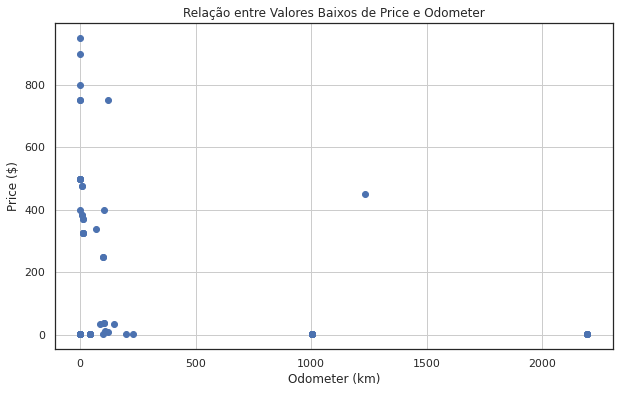

In [275]:
import matplotlib.pyplot as plt

low_values = vehicles[(vehicles['price'] < 1000) & (vehicles['odometer'] < 3000)]

plt.figure(figsize=(10, 6))
plt.scatter(low_values['odometer'], low_values['price'])
plt.title("Relação entre Valores Baixos de Price e Odometer")
plt.xlabel("Odometer (km)")
plt.ylabel("Price ($)")
plt.grid(True)
plt.show()

Analisando o gráfico de dispersão, podemos analisar que há veiculos com o odômetro baixo e ao mesmo tempo com o preço baixo, basicamente não há como considerar esses dados devido os erros em seu preenchimento. 

## Corrija os tipos de dados

Vou alterar o tipo de dados das colunas 'model_year', 'condition', 'odometer' e 'price'.

In [276]:
vehicles['model_year'] = vehicles['model_year'].astype('int64')
vehicles['condition'] = vehicles['condition'].astype('int64')
vehicles['odometer'] = vehicles['odometer'].astype('int64')
vehicles['price'] = vehicles['price'].astype(float)

In [277]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  float64
 1   model_year    51525 non-null  int64  
 2   model         51525 non-null  object 
 3   condition     51525 non-null  int64  
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  int64  
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 5.1+ MB


In [278]:
duplicates = vehicles.duplicated()
print("Número de duplicatas encontradas:", duplicates.sum())

Número de duplicatas encontradas: 0


## Enriqueça os dados

In [279]:
vehicles['date_posted'] = pd.to_datetime(vehicles['date_posted'])

vehicles['day_of_week'] = vehicles['date_posted'].dt.dayofweek
vehicles['month'] = vehicles['date_posted'].dt.month
vehicles['year'] = vehicles['date_posted'].dt.year

In [280]:
vehicles['vehicle_age'] = vehicles['date_posted'].dt.year - vehicles['model_year']

In [281]:
vehicles['mileage_per_year'] = vehicles['odometer'] / vehicles['vehicle_age']

In [282]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             51525 non-null  float64       
 1   model_year        51525 non-null  int64         
 2   model             51525 non-null  object        
 3   condition         51525 non-null  int64         
 4   cylinders         51525 non-null  float64       
 5   fuel              51525 non-null  object        
 6   odometer          51525 non-null  int64         
 7   transmission      51525 non-null  object        
 8   type              51525 non-null  object        
 9   paint_color       51525 non-null  object        
 10  is_4wd            51525 non-null  float64       
 11  date_posted       51525 non-null  datetime64[ns]
 12  days_listed       51525 non-null  int64         
 13  day_of_week       51525 non-null  int64         
 14  month             5152

In [283]:
missing_mileage = vehicles['mileage_per_year'].isna().sum()
print(missing_mileage)

rows_with_missing_values = vehicles[vehicles.isnull().any(axis=1)]

print(rows_with_missing_values)

2
         price  model_year         model  condition  cylinders    fuel  \
17037  45400.0        2018      ram 3500          3        6.0  diesel   
40489  15900.0        2018  toyota prius          3        4.0  hybrid   

       odometer transmission       type paint_color  is_4wd date_posted  \
17037         0    automatic     pickup       black     1.0  2018-12-16   
40489         0    automatic  hatchback        blue     0.0  2018-07-30   

       days_listed  day_of_week  month  year  vehicle_age  mileage_per_year  
17037           18            6     12  2018            0               NaN  
40489           31            0      7  2018            0               NaN  


Analisando os valores ausentes nesta coluna e são de grande maioria veículos com poucos anos porém com condições de uso diversas e que obviamente não são de carros novos. Neste caso vamos agrupar algumas colunas para encontrar uma média.

Preencher esses valores ausentes na coluna 'mileage_per_year' e calcular a média dos valores conhecidos de 'mileage_per_year' para veículos com o mesmo ano de modelo, pode ser uma estimativa razoável da quilometragem anual média para veículos semelhantes.

In [284]:
average_mileage_per_year_by_model_year = vehicles.groupby('model_year')['mileage_per_year'].mean()

def fill_missing_mileage(row):
    if pd.isnull(row['mileage_per_year']):
        return average_mileage_per_year_by_model_year[row['model_year']]
    return row['mileage_per_year']

vehicles['mileage_per_year'] = vehicles.apply(fill_missing_mileage, axis=1)

In [285]:
vehicles['mileage_per_year'].isna().sum()

0

Agora que enriquecemos todos os valores e preenchemos, podemos prosseguir para os próximos passos. 

In [286]:
vehicles['mileage_per_year'].unique()

array([20714.28571429,  8870.5       , 18333.33333333, ...,
       17627.2       , 11343.75      , 27914.6       ])

In [287]:
vehicles.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             51525 non-null  float64       
 1   model_year        51525 non-null  int64         
 2   model             51525 non-null  object        
 3   condition         51525 non-null  int64         
 4   cylinders         51525 non-null  float64       
 5   fuel              51525 non-null  object        
 6   odometer          51525 non-null  int64         
 7   transmission      51525 non-null  object        
 8   type              51525 non-null  object        
 9   paint_color       51525 non-null  object        
 10  is_4wd            51525 non-null  float64       
 11  date_posted       51525 non-null  datetime64[ns]
 12  days_listed       51525 non-null  int64         
 13  day_of_week       51525 non-null  int64         
 14  month             5152

## Verifique os dados limpos

In [288]:
print(vehicles.info())
print("\n")
print(vehicles.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             51525 non-null  float64       
 1   model_year        51525 non-null  int64         
 2   model             51525 non-null  object        
 3   condition         51525 non-null  int64         
 4   cylinders         51525 non-null  float64       
 5   fuel              51525 non-null  object        
 6   odometer          51525 non-null  int64         
 7   transmission      51525 non-null  object        
 8   type              51525 non-null  object        
 9   paint_color       51525 non-null  object        
 10  is_4wd            51525 non-null  float64       
 11  date_posted       51525 non-null  datetime64[ns]
 12  days_listed       51525 non-null  int64         
 13  day_of_week       51525 non-null  int64         
 14  month             5152

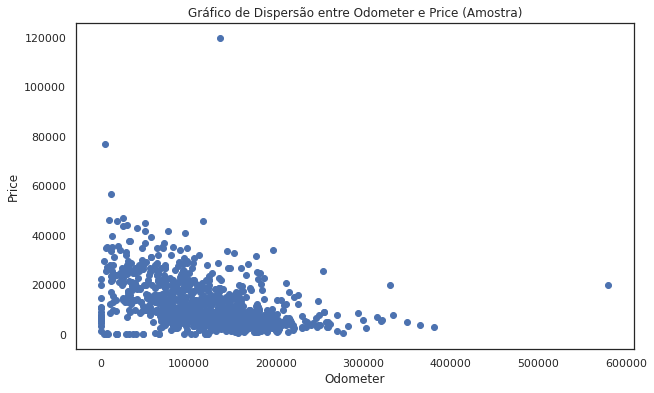

In [289]:
import matplotlib.pyplot as plt

sample = vehicles.sample(n=1000, random_state=42)

plt.figure(figsize=(10, 6))
plt.scatter(sample['odometer'], sample['price'])
plt.title("Gráfico de Dispersão entre Odometer e Price (Amostra)")
plt.xlabel("Odometer")
plt.ylabel("Price")
plt.show()

## Estude os parâmetros fundamentais

Os parâmetros são
- Preço
- A idade do veículo quando a propaganda foi colocada
- Quilometragem
- Número de cilindros
- Condição

In [290]:
print(vehicles['price'].describe())



count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64


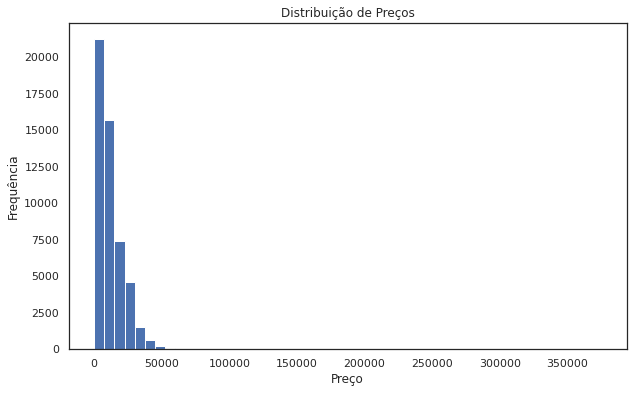

In [291]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(vehicles['price'], bins=50)
plt.title("Distribuição de Preços")
plt.xlabel("Preço")
plt.ylabel("Frequência")
plt.show()


Temos uma quantidade extamamente alta de valores baixos ba coluna 'price', obviamente em tese é normal para veículos usados mas existem valores além do normal. 


In [292]:
vehicles.corr()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,day_of_week,month,year,vehicle_age,mileage_per_year
price,1.000000,0.419032,0.221518,0.300342,-0.419129,0.315145,-0.000682,-0.000343,-0.005653,0.004726,-0.417741,0.227536
model_year,0.419032,1.000000,0.291622,-0.147183,-0.486777,0.038013,-0.004989,-0.006396,-0.009220,0.007876,-0.997175,0.497168
condition,0.221518,0.291622,1.000000,-0.065661,-0.293393,0.012856,-0.002404,0.001152,-0.002355,0.003788,-0.290686,0.099288
cylinders,0.300342,-0.147183,-0.065661,1.000000,0.096957,0.407298,0.003181,-0.003487,0.001471,-0.000329,0.146830,-0.033798
odometer,-0.419129,-0.486777,-0.293393,0.096957,1.000000,0.038301,0.003036,0.000314,0.009460,-0.006822,0.485178,0.122818
is_4wd,0.315145,0.038013,0.012856,0.407298,0.038301,1.000000,0.002003,0.003207,0.003891,-0.002476,-0.038114,0.053680
days_listed,-0.000682,-0.004989,-0.002404,0.003181,0.003036,0.002003,1.000000,0.002734,-0.011519,0.011273,0.005824,-0.003201
day_of_week,-0.000343,-0.006396,0.001152,-0.003487,0.000314,0.003207,0.002734,1.000000,0.006457,-0.007476,0.005820,-0.003258
month,-0.005653,-0.009220,-0.002355,0.001471,0.009460,0.003891,-0.011519,0.006457,1.000000,-0.818207,-0.052262,0.105675
year,0.004726,0.007876,0.003788,-0.000329,-0.006822,-0.002476,0.011273,-0.007476,-0.818207,1.000000,0.067259,-0.125561


A coluna de preço tem uma correlação positiva moderada com as colunas de ano do modelo do veículo e idade do veículo. Isso indica que veículos mais novos geralmente têm preços mais altos. Além disso, tem uma correlação negativa com a coluna de odômetro, o que indica que veículos com maior quilometragem tendem a ter preços mais baixos.

In [293]:
print(vehicles['vehicle_age'].describe())




count    51525.000000
mean         8.521184
std          6.143031
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: vehicle_age, dtype: float64


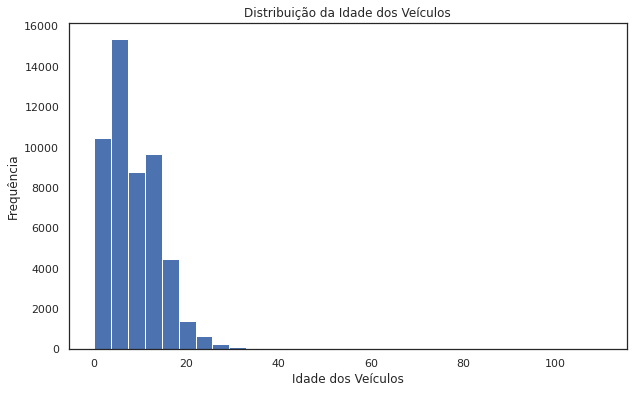

In [294]:
plt.figure(figsize=(10, 6))
plt.hist(vehicles['vehicle_age'], bins=30)
plt.title("Distribuição da Idade dos Veículos")
plt.xlabel("Idade dos Veículos")
plt.ylabel("Frequência")
plt.show()

In [295]:
print(vehicles['odometer'].describe())



count     51525.000000
mean     115392.758117
std       62655.568907
min           0.000000
25%       72023.000000
50%      114000.000000
75%      153322.000000
max      990000.000000
Name: odometer, dtype: float64


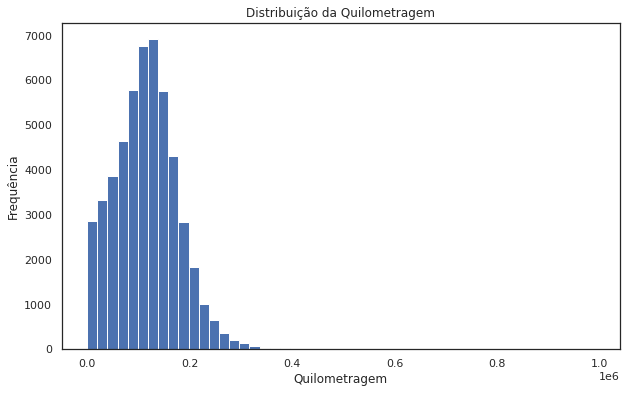

In [296]:
plt.figure(figsize=(10, 6))
plt.hist(vehicles['odometer'], bins=50)
plt.title("Distribuição da Quilometragem")
plt.xlabel("Quilometragem")
plt.ylabel("Frequência")
plt.show()

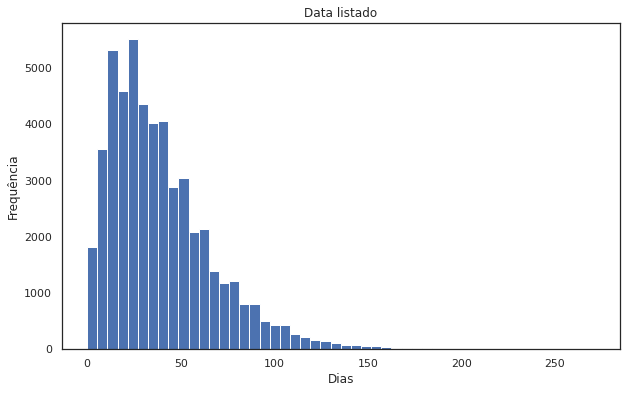

In [297]:
plt.figure(figsize=(10, 6))
plt.hist(vehicles['days_listed'], bins=50)
plt.title("Data listado")
plt.xlabel("Dias")
plt.ylabel("Frequência")
plt.show()

In [298]:
print(vehicles['cylinders'].value_counts())



8.0     17712
6.0     17435
4.0     15499
10.0      549
5.0       294
3.0        34
12.0        2
Name: cylinders, dtype: int64


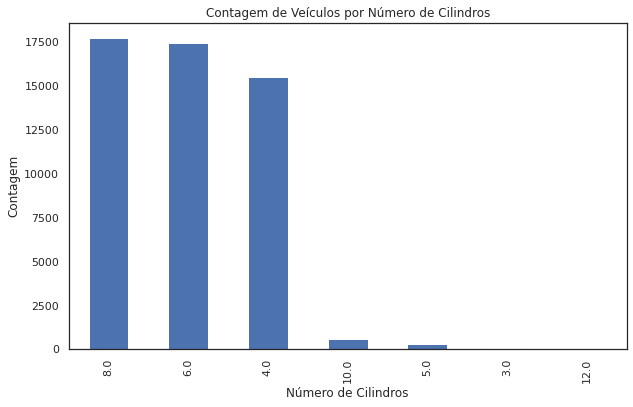

In [299]:
plt.figure(figsize=(10, 6))
vehicles['cylinders'].value_counts().plot(kind='bar')
plt.title("Contagem de Veículos por Número de Cilindros")
plt.xlabel("Número de Cilindros")
plt.ylabel("Contagem")
plt.show()



In [300]:
print(vehicles['condition'].value_counts())


3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: condition, dtype: int64


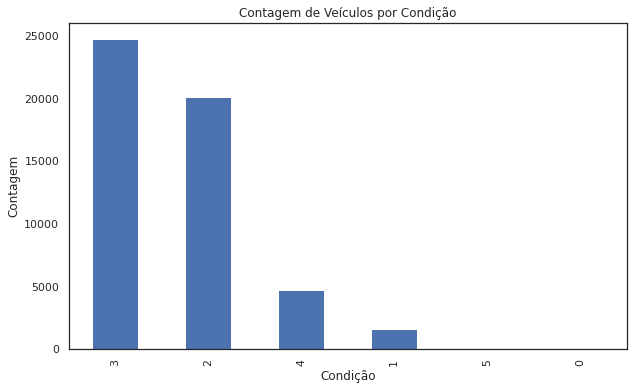

In [301]:
plt.figure(figsize=(10, 6))
vehicles['condition'].value_counts().plot(kind='bar')
plt.title("Contagem de Veículos por Condição")
plt.xlabel("Condição")
plt.ylabel("Contagem")
plt.show()

In [302]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             51525 non-null  float64       
 1   model_year        51525 non-null  int64         
 2   model             51525 non-null  object        
 3   condition         51525 non-null  int64         
 4   cylinders         51525 non-null  float64       
 5   fuel              51525 non-null  object        
 6   odometer          51525 non-null  int64         
 7   transmission      51525 non-null  object        
 8   type              51525 non-null  object        
 9   paint_color       51525 non-null  object        
 10  is_4wd            51525 non-null  float64       
 11  date_posted       51525 non-null  datetime64[ns]
 12  days_listed       51525 non-null  int64         
 13  day_of_week       51525 non-null  int64         
 14  month             5152

## Estude e cuide dos valores ausentes


Vamos tratar remover os valores atípicos de algumas colunas do DataFrame, as colunas que vamos abordar são: price, vehicle_age e odometer.

Primeiro, vamos começar definindo limites inferior e superior para cada coluna. Valores fora desses limites serão considerados atípicos e removidos.

In [303]:
Q1 = vehicles['price'].quantile(0.25)
Q3 = vehicles['price'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR

print("Limite Inferior para Price:", lower_limit)


Limite Inferior para Price: -12758.5


O cálculo do limite inferior utilizando o IQR pode estar sendo afetado pelos valores atípicos presentes na coluna "price", a maior parte dos valores está abaixo de 17000, e calcular um limite inferior muito baixo pode resultar em valores negativos que não fazem sentido para o contexto dos preços dos veículos.

Uma abordagem mais sensata seria considerar um limite inferior que esteja mais alinhado com a distribuição dos dados e que não produza valores negativos. Uma opção seria definir o limite inferior como o valor do primeiro quartil (25%) dos preços, que é 5000, já que grande parte dos valores está acima disso. Isso evitaria valores negativos e ainda assim filtraria alguns dos valores extremamente baixos que podem ser considerados como outliers.

In [304]:
lower_limit_price = 5000
print("Limite Inferior para Price:", lower_limit_price)
#lower_limit_price = vehicles[vehicles['price'] >= lower_limit]


Limite Inferior para Price: 5000


In [305]:
Q1 = vehicles['odometer'].quantile(0.25)
Q3 = vehicles['odometer'].quantile(0.75)
IQR = Q3 - Q1

lower_limit_od = Q1 - 1.5 * IQR

print("Limite Inferior para odometer:", lower_limit_od)

Limite Inferior para odometer: -49925.5


In [306]:
lower_limit_odometer = 1000  
print("Limite Inferior para odometer:", lower_limit_odometer)
#lower_limit_odometer = vehicles[vehicles['odometer'] >= lower_limit_odometer]

Limite Inferior para odometer: 1000


A definição do limite inferior de 1000 km para a coluna "odometer" foi escolhida com base em uma suposição razoável de que a maioria dos veículos não teria uma quilometragem inferior a esse valor, a menos que sejam veículos novos ou tenham sido utilizados em circunstâncias muito limitadas. Essa escolha ajuda a filtrar valores que parecem improváveis ou incorretos, contribuindo para uma análise mais precisa dos dados.

In [307]:
Q1 = vehicles['vehicle_age'].quantile(0.25)
Q3 = vehicles['vehicle_age'].quantile(0.75)
IQR = Q3 - Q1

lower_limit_vehicle_age = Q1 - 1.5 * IQR

print("Limite Inferior para vehicle_age:", lower_limit_vehicle_age)

Limite Inferior para vehicle_age: -8.0


Para a coluna "vehicle_age", podemos definir um limite inferior de 0 anos, uma vez que não faz sentido ter veículos com idade negativa. Essa escolha é fundamentada na natureza dos dados e na impossibilidade prática de um veículo ter uma idade negativa. Portanto, podemos filtrar qualquer valor de "vehicle_age" menor que 0 para garantir a integridade dos dados e facilitar a análise subsequente.

In [308]:
lower_vehicle_age = 0
print("Limite Inferior para vehicle_age:", lower_vehicle_age)

Limite Inferior para vehicle_age: 0


In [309]:
Q1_price = vehicles['price'].quantile(0.25)
Q3_price = vehicles['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
upper_limit_price = Q3_price + 1.5 * IQR_price

Q1_odometer = vehicles['odometer'].quantile(0.25)
Q3_odometer = vehicles['odometer'].quantile(0.75)
IQR_odometer = Q3_odometer - Q1_odometer
upper_limit_odometer = Q3_odometer + 1.5 * IQR_odometer

Q1_vehicle_age = vehicles['vehicle_age'].quantile(0.25)
Q3_vehicle_age = vehicles['vehicle_age'].quantile(0.75)
IQR_vehicle_age = Q3_vehicle_age - Q1_vehicle_age
upper_limit_vehicle_age = Q3_vehicle_age + 1.5 * IQR_vehicle_age

print("Limite Superior para Price:",upper_limit_price)

print("Limite Inferior para Odometer:",upper_limit_odometer)

print("Limite Inferior para Vehicle_age:",upper_limit_vehicle_age)

Limite Superior para Price: 34597.5
Limite Inferior para Odometer: 275270.5
Limite Inferior para Vehicle_age: 24.0


Determinamos os valores superiores para as colunas 'Price', 'odometer' e 'vehicles_age'

Ao realizar a análise dos dados,para lidar com esse desafio, optamos por utilizar o método do (IQR) para definir os valores superiores, identificamos os valores que estão mais de 1,5 vezes o IQR acima do terceiro quartil (Q3) como possíveis valores atípicos. Essa abordagem nos permite focar nos pontos que estão significativamente distantes do centro da distribuição, garantindo que nossa análise seja mais representativa e que possamos tomar decisões futuras.

In [310]:
sprint = vehicles.query(
    f'({lower_limit_price} <= price <= {upper_limit_price}) and '
    f'({lower_limit_vehicle_age} <= vehicle_age <= {upper_limit_vehicle_age}) and '
    f'({lower_limit_odometer} <= odometer <= {upper_limit_odometer})'
)

In [311]:
vehicles.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             51525 non-null  float64       
 1   model_year        51525 non-null  int64         
 2   model             51525 non-null  object        
 3   condition         51525 non-null  int64         
 4   cylinders         51525 non-null  float64       
 5   fuel              51525 non-null  object        
 6   odometer          51525 non-null  int64         
 7   transmission      51525 non-null  object        
 8   type              51525 non-null  object        
 9   paint_color       51525 non-null  object        
 10  is_4wd            51525 non-null  float64       
 11  date_posted       51525 non-null  datetime64[ns]
 12  days_listed       51525 non-null  int64         
 13  day_of_week       51525 non-null  int64         
 14  month             5152

In [312]:
sprint.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35897 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             35897 non-null  float64       
 1   model_year        35897 non-null  int64         
 2   model             35897 non-null  object        
 3   condition         35897 non-null  int64         
 4   cylinders         35897 non-null  float64       
 5   fuel              35897 non-null  object        
 6   odometer          35897 non-null  int64         
 7   transmission      35897 non-null  object        
 8   type              35897 non-null  object        
 9   paint_color       35897 non-null  object        
 10  is_4wd            35897 non-null  float64       
 11  date_posted       35897 non-null  datetime64[ns]
 12  days_listed       35897 non-null  int64         
 13  day_of_week       35897 non-null  int64         
 14  month             3589

Definimos os limites inferiores e superiores, e armazenamos no novo dataframe 'sprint' e agora estamos com os dados protos para prosseguir com nossa análise. 

## Estude os parâmetros fundamentais sem valores atípicos

Comparando as diferenças entre os gráficos com os valores atípicos e os gráficos sem os valores atípicos.

In [313]:
sprint.describe()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,day_of_week,month,year,vehicle_age,mileage_per_year
count,35897.000000,35897.000000,35897.000000,35897.000000,35897.000000,35897.000000,35897.000000,35897.000000,35897.000000,35897.000000,35897.000000,35897.000
mean,13952.458339,2011.283506,2.716216,6.194752,106535.331114,0.540157,39.538987,3.000306,6.612168,2018.308438,7.024932,inf
std,7204.507099,4.410571,0.654017,1.638807,51443.322971,0.498392,28.301058,1.989785,3.471928,0.461855,4.427897,NaN
min,5000.000000,1994.000000,0.000000,3.000000,1000.000000,0.000000,0.000000,0.000000,1.000000,2018.000000,0.000000,97.875
25%,7995.000000,2008.000000,2.000000,4.000000,69683.000000,0.000000,19.000000,1.000000,3.000000,2018.000000,4.000000,12000.000
50%,11999.000000,2012.000000,3.000000,6.000000,105000.000000,1.000000,33.000000,3.000000,7.000000,2018.000000,6.000000,16509.750
75%,18495.000000,2015.000000,3.000000,8.000000,139717.000000,1.000000,53.000000,5.000000,10.000000,2019.000000,10.000000,23775.600
max,34595.000000,2019.000000,5.000000,12.000000,275050.000000,1.000000,271.000000,6.000000,12.000000,2019.000000,24.000000,inf


In [314]:
vehicles.corr()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,day_of_week,month,year,vehicle_age,mileage_per_year
price,1.000000,0.419032,0.221518,0.300342,-0.419129,0.315145,-0.000682,-0.000343,-0.005653,0.004726,-0.417741,0.227536
model_year,0.419032,1.000000,0.291622,-0.147183,-0.486777,0.038013,-0.004989,-0.006396,-0.009220,0.007876,-0.997175,0.497168
condition,0.221518,0.291622,1.000000,-0.065661,-0.293393,0.012856,-0.002404,0.001152,-0.002355,0.003788,-0.290686,0.099288
cylinders,0.300342,-0.147183,-0.065661,1.000000,0.096957,0.407298,0.003181,-0.003487,0.001471,-0.000329,0.146830,-0.033798
odometer,-0.419129,-0.486777,-0.293393,0.096957,1.000000,0.038301,0.003036,0.000314,0.009460,-0.006822,0.485178,0.122818
is_4wd,0.315145,0.038013,0.012856,0.407298,0.038301,1.000000,0.002003,0.003207,0.003891,-0.002476,-0.038114,0.053680
days_listed,-0.000682,-0.004989,-0.002404,0.003181,0.003036,0.002003,1.000000,0.002734,-0.011519,0.011273,0.005824,-0.003201
day_of_week,-0.000343,-0.006396,0.001152,-0.003487,0.000314,0.003207,0.002734,1.000000,0.006457,-0.007476,0.005820,-0.003258
month,-0.005653,-0.009220,-0.002355,0.001471,0.009460,0.003891,-0.011519,0.006457,1.000000,-0.818207,-0.052262,0.105675
year,0.004726,0.007876,0.003788,-0.000329,-0.006822,-0.002476,0.011273,-0.007476,-0.818207,1.000000,0.067259,-0.125561


In [315]:
sprint.corr()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,day_of_week,month,year,vehicle_age,mileage_per_year
price,1.000000,0.460204,0.093831,0.344556,-0.441846,0.333555,-0.002421,0.001668,-0.002120,0.003625,-0.458025,0.180499
model_year,0.460204,1.000000,0.163746,-0.283594,-0.587877,-0.131601,-0.002550,-0.000353,-0.013381,0.014770,-0.994546,0.531178
condition,0.093831,0.163746,1.000000,-0.122475,-0.182507,-0.040889,-0.002746,-0.002010,-0.002403,0.002864,-0.162806,0.046248
cylinders,0.344556,-0.283594,-0.122475,1.000000,0.248403,0.384695,0.005772,-0.006289,0.004247,-0.003949,0.282072,-0.078802
odometer,-0.441846,-0.587877,-0.182507,0.248403,1.000000,0.173333,0.007073,0.000717,0.010253,-0.008578,0.584682,0.090471
is_4wd,0.333555,-0.131601,-0.040889,0.384695,0.173333,1.000000,0.004776,0.004131,0.007809,-0.006973,0.130359,-0.003698
days_listed,-0.002421,-0.002550,-0.002746,0.005772,0.007073,0.004776,1.000000,0.004102,-0.009992,0.009180,0.003497,-0.000967
day_of_week,0.001668,-0.000353,-0.002010,-0.006289,0.000717,0.004131,0.004102,1.000000,0.006425,-0.007894,-0.000472,-0.002721
month,-0.002120,-0.013381,-0.002403,0.004247,0.010253,0.007809,-0.009992,0.006425,1.000000,-0.817160,-0.071906,0.127707
year,0.003625,0.014770,0.002864,-0.003949,-0.008578,-0.006973,0.009180,-0.007894,-0.817160,1.000000,0.089593,-0.150390


A correlação com a coluna 'model_year' aumentou de 0.419 para 0.460, indicando uma correlação mais forte entre o ano do modelo e o preço quando os valores atípicos são removidos. A correlação com 'model_year' diminuiu de -0.486 para -0.588, indicando uma relação ainda mais forte entre o ano do modelo e o odômetro após a remoção dos valores atípicos, com 'model_year' aumentou de 0.497 para 0.531, indicando uma correlação mais forte entre o ano do modelo e a quilometragem por ano após a remoção dos valores atípicos.

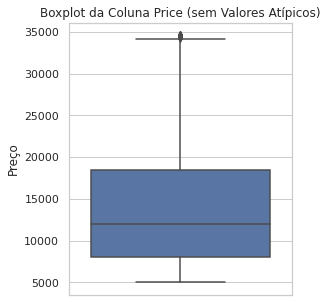

In [316]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(4, 5))
sns.boxplot(data=sprint, y='price')
plt.title('Boxplot da Coluna Price (sem Valores Atípicos)')
plt.ylabel('Preço')
plt.show()

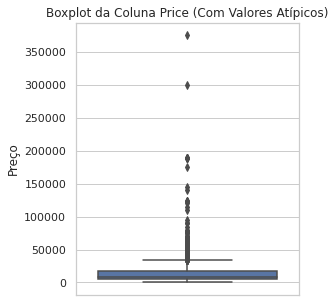

In [317]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(4, 5))
sns.boxplot(data=vehicles, y='price')
plt.title('Boxplot da Coluna Price (Com Valores Atípicos)')
plt.ylabel('Preço')
plt.show()

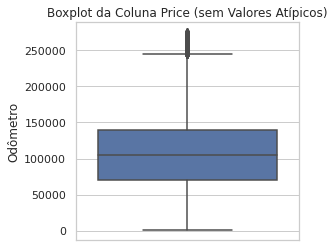

In [318]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(4, 4))
sns.boxplot(data=sprint, y='odometer')
plt.title('Boxplot da Coluna Price (sem Valores Atípicos)')
plt.ylabel('Odômetro')
plt.show()

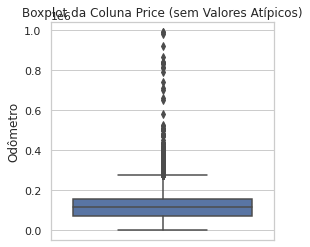

In [319]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(4, 4))
sns.boxplot(data=vehicles, y='odometer')
plt.title('Boxplot da Coluna Price (sem Valores Atípicos)')
plt.ylabel('Odômetro')
plt.show()

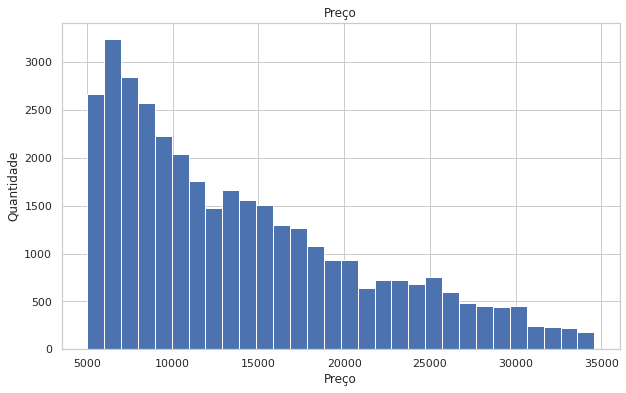

In [320]:
plt.figure(figsize=(10, 6))
plt.hist(sprint['price'], bins=30)
plt.title("Preço")
plt.xlabel("Preço")
plt.ylabel("Quantidade")
plt.show()

A distribuição da coluna 'price' nos histogramas pode ter mudado,sem os valores atípicos, a distribuição dos preços pode está   concentrada em um intervalo específico, indicando uma maior homogeneidade nos preços dos veículos.

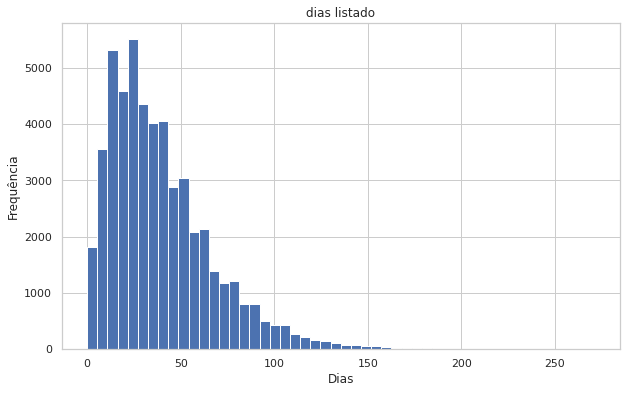

In [321]:
plt.figure(figsize=(10, 6))
plt.hist(vehicles['days_listed'], bins=50)
plt.title("dias listado")
plt.xlabel("Dias")
plt.ylabel("Frequência")
plt.show()

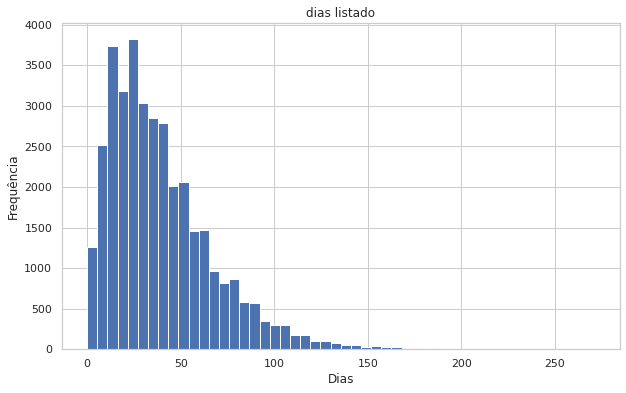

In [322]:
plt.figure(figsize=(10, 6))
plt.hist(sprint['days_listed'], bins=50)
plt.title("dias listado")
plt.xlabel("Dias")
plt.ylabel("Frequência")
plt.show()

Apesar da remoção dos dados não tivemos grandes mudanças em seu gráficos, os picos estão em faixas de dias similares e mostra que mesmo sem os outliers temos uma coluna muito consistente.

A coluna 'days_listed' mostra uma distribuição mais uniforme e distribuição mais simétrica após a remoção de valores atípicos, o que pode indicar uma tendência mais consistente de tempo de listagem indicando que a grande maioria dos veículos são vendidos com menos de 100 dias. 

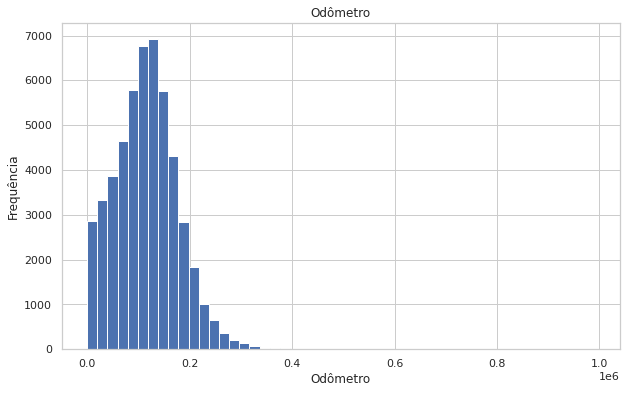

In [323]:
plt.figure(figsize=(10, 6))
plt.hist(vehicles['odometer'], bins=50)
plt.title("Odômetro")
plt.xlabel("Odômetro")
plt.ylabel("Frequência")
plt.show()

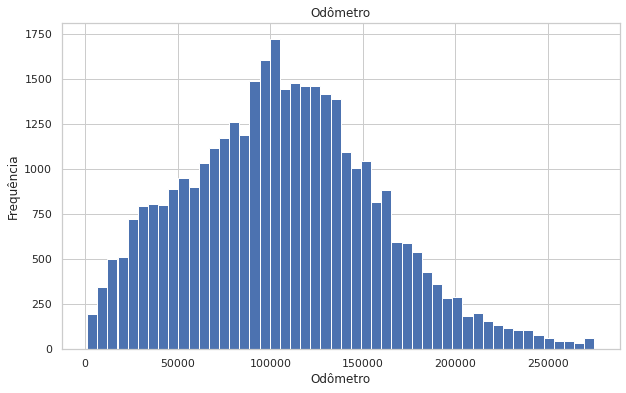

In [324]:
plt.figure(figsize=(10, 6))
plt.hist(sprint['odometer'], bins=50)
plt.title("Odômetro")
plt.xlabel("Odômetro")
plt.ylabel("Frequência")
plt.show()

Em 'odometer' houve um grande melhoria na assimetria dos dados e a grande maioria está na faixa de 50000 a 150000 quilômetros que são valores normais de rodagem para veículos variádos.

Assim como na coluna 'days_listed' essa coluna tem sim sua consistência mas obviamente sem os outliers temos uma faixa de dados mais reduzida porém bem distribuída. 

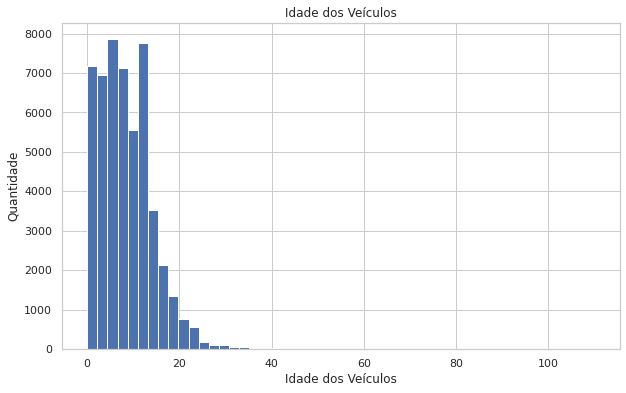

In [325]:
plt.figure(figsize=(10, 6))
plt.hist(vehicles['vehicle_age'], bins=50)
plt.title("Idade dos Veículos")
plt.xlabel("Idade dos Veículos")
plt.ylabel("Quantidade")
plt.show()

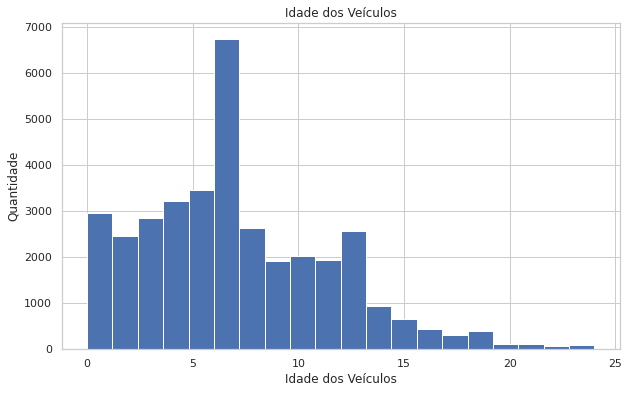

In [326]:
plt.figure(figsize=(10, 6))
plt.hist(sprint['vehicle_age'], bins=20)
plt.title("Idade dos Veículos")
plt.xlabel("Idade dos Veículos")
plt.ylabel("Quantidade")
plt.show()

Com a remoção dos outliers, tivemos impacto na coluna 'vehicle_age' no gráfico mas nos valores brutos não e o que quero dizer com isso, no gráfico com os outliers temos alguns ('basicamente um') veículo que tinha uma idade extramente avançada e isso causa uma certa 'distorção' ao comparar os gráficos como se tivemos perdido muito mas na verdade houve perda em quantidade devido a remoção dos valores.

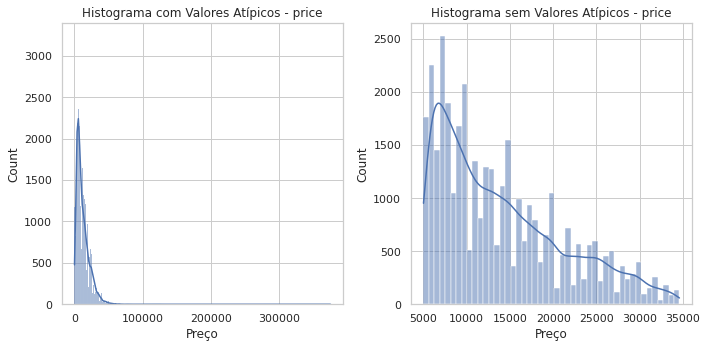

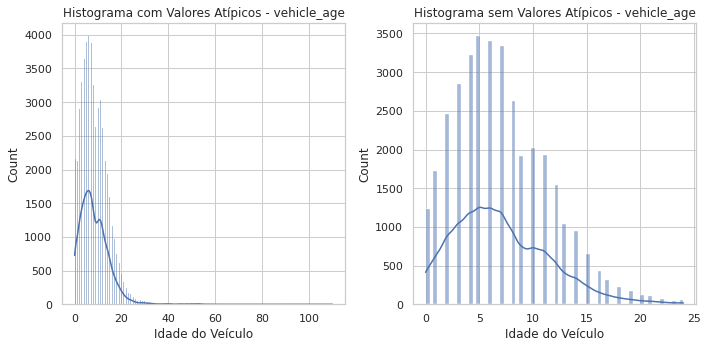

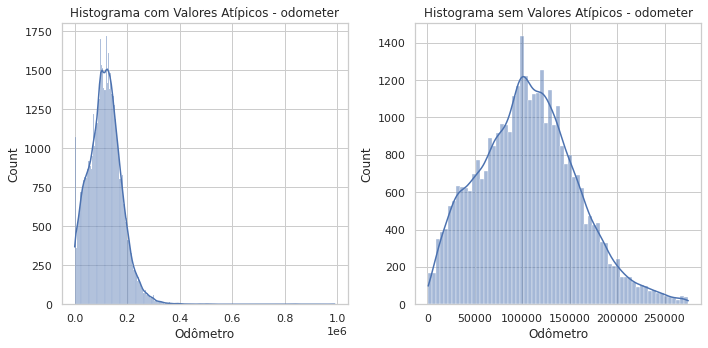

In [327]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

def plot_histogram_comparison(data1, data2, column_name, x_label):
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data=data1, x=column_name, kde=True)
    plt.title(f'Histograma com Valores Atípicos - {column_name}')
    plt.xlabel(x_label)
    
    plt.subplot(1, 2, 2)
    sns.histplot(data=data2, x=column_name, kde=True)
    plt.title(f'Histograma sem Valores Atípicos - {column_name}')
    plt.xlabel(x_label)
    
    plt.tight_layout()
    plt.show()

plot_histogram_comparison(vehicles, sprint, 'price', 'Preço')
plot_histogram_comparison(vehicles, sprint, 'vehicle_age', 'Idade do Veículo')
plot_histogram_comparison(vehicles, sprint, 'odometer', 'Odômetro')


Podemos notar que após a remoção dos valores atípicos houve uma clara melhora nos dados com uma assimetria melhor, ficou nítido também a diminuição de valores baixdos tanto em 'price', 'odometer' e em 'vehicle_age' e creio que isso ajudará a ter uma análise mais ampla tanto para valores baixos como altos pois o impacto de dos lados estão mais nivelados.

As relações entre variáveis, como 'price' em relação a 'vehicle_age' ou 'odometer', a relação entre preço e idade do veículo pode ter se fortalecido sem os valores atípicos, indicando que a idade tem um papel mais consistente na determinação do preço.

## Tempo de vida das propagandas


Vamos começar com o cálculo da média e mediana do tempo de vida útil das propagandas

In [328]:
sprint['days_listed'].describe()

count    35897.000000
mean        39.538987
std         28.301058
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

In [329]:
mean_days_listed = sprint['days_listed'].mean()
median_days_listed = sprint['days_listed'].median()

print("Média de dias listados:", mean_days_listed)
print("Mediana de dias listados:", median_days_listed)

Média de dias listados: 39.53898654483662
Mediana de dias listados: 33.0


<AxesSubplot:xlabel='days_listed'>

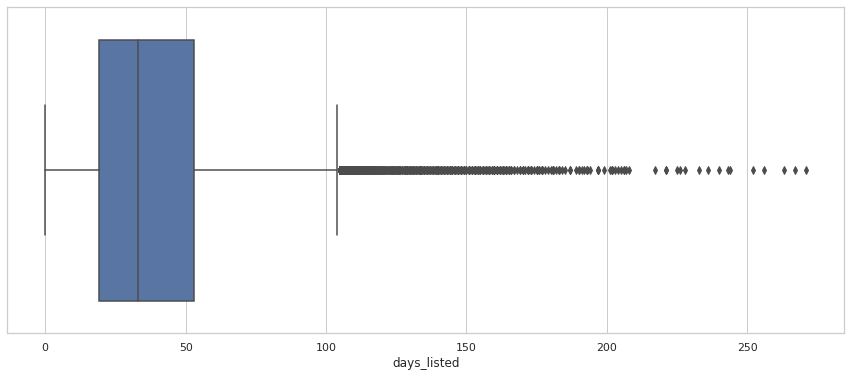

In [330]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
sns.boxplot(x=sprint['days_listed'])


Podemos determinar as propagandas como rapidamente removidas que estão abaixo de 25% em 'days_listed' ou definir como 0 ou 1, pois analisando o boxplot se aplicarmos o intervalor  do IQR o valor será negativo como ocorreu em outras colunas anteriormente. 

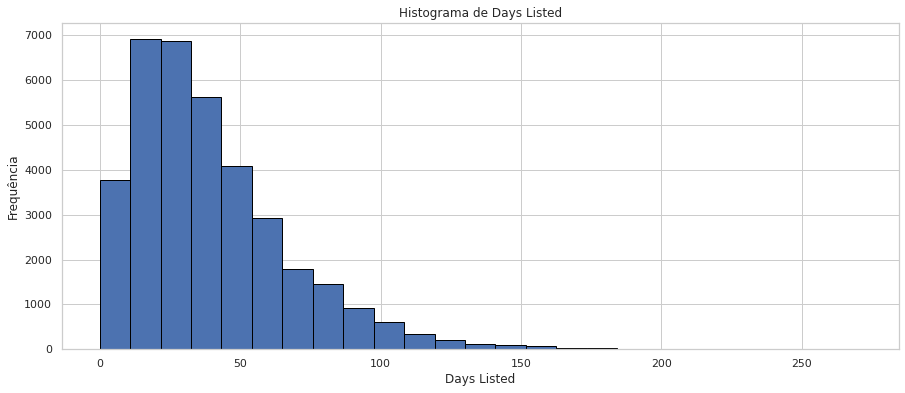

In [331]:
plt.figure(figsize=(15, 6))
plt.hist(sprint['days_listed'], bins=25, edgecolor='black')
plt.title("Histograma de Days Listed")
plt.xlabel("Days Listed")
plt.ylabel("Frequência")
plt.show()

Vamos determinar as propagando rápidas em 25% pois é o metodo mais "conservador" tendo em vista que o IQR não seria possível para essa definição e que determinar valores como 0 e 1 são valores que indicam nem sempre uma "venda rápida" e que também podem ser valores de anuncio removidos por erros ou desistências do dono que listou o veículo mas que também podem ser sim vendas rápidas mas pensando nesses fatores e que eles podem também ocorrer em anuncio de 10 ou 15 dias por  exemplo o melhor é definir como 25% como um corte conservados para esses casos.

In [332]:
fast_listing_ads = sprint['days_listed'].quantile(0.25)
fast_ads = sprint[sprint['days_listed'] <= fast_listing_ads]

Q1 = sprint['days_listed'].quantile(0.25)
Q3 = sprint['days_listed'].quantile(0.75)
IQR = Q3 - Q1
long_ads_lower = Q3 + 1.5 * IQR
long_ads = sprint[sprint['days_listed'] >= long_ads_lower]

print("Número de propagandas removidas rapidamente:", len(fast_ads))
print("Número de propagandas listadas por um tempo anormalmente longo:", len(long_ads))

Número de propagandas removidas rapidamente: 9434
Número de propagandas listadas por um tempo anormalmente longo: 1190


Temos a média em 39.53 e a mediana em 33.00 que mostra que nossa coluna tem uma assimetria positiva e que há uma quantidade relevante de valores até cerca de 100 a 120 dias que aumentam a mediana, isso é causado por valores atípicos, veículos que demoraram um tempo maior para ser vendido mas a grande maioria 75% dos valores são vendidos em 53 dias, que é um ótimo indicativo de que a maioria dos veículos são vendidos rapidamente. 

## Média de preços por cada tipo de veículo

Para analisar o número de propagandas e o preço médio para cada tipo de veículo, podemos criar um gráfico de barra que mostra essa relação. Vamos selecionar os dois tipos de veículos com o maior número de propagandas e plotar o gráfico:



In [333]:
vehicle_stats = sprint.groupby('type').agg({'price': 'mean', 'days_listed': 'count'})

vehicle_stats.rename(columns={'days_listed': 'number_of_ads'}, inplace=True)

vehicle_stats = vehicle_stats.sort_values(by='number_of_ads', ascending=False)

print(vehicle_stats)

                    price  number_of_ads
type                                    
truck        16951.827364           9633
SUV          12945.398434           8812
sedan         9380.072276           7167
pickup       17080.829227           5358
coupe        17247.845791           1485
wagon        11060.076923           1079
mini-van     10802.191341            716
hatchback     9032.790970            598
van          11298.022167            406
convertible  15283.035461            282
other        12574.580110            181
offroad      15441.895062            162
bus          20904.500000             18


Os dois maiores são "SUV" e "Truck", agora vamos analisar a relação do preço médio ao tipo de veículo: 


In [334]:
top_vehicle_types = vehicle_stats.head(2).index
top_vehicle_data = sprint[sprint['type'].isin(top_vehicle_types)]

top_vehicle_data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_of_week,month,year,vehicle_age,mileage_per_year
0,9400.0,2011,bmw x5,2,6.0,gas,145000,automatic,SUV,Unknown,1.0,2018-06-23,19,5,6,2018,7,20714.285714
7,15990.0,2013,honda pilot,3,6.0,gas,109473,automatic,SUV,black,1.0,2019-01-07,68,0,1,2019,6,18245.500000
8,11500.0,2012,kia sorento,3,4.0,gas,104174,automatic,SUV,Unknown,1.0,2018-07-16,19,0,7,2018,6,17362.333333
9,9200.0,2008,honda pilot,3,6.0,gas,147191,automatic,SUV,blue,1.0,2019-02-15,17,4,2,2019,11,13381.000000
14,12990.0,2009,gmc yukon,3,8.0,gas,132285,automatic,SUV,black,1.0,2019-01-31,24,3,1,2019,10,13228.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51495,9500.0,2012,chevrolet traverse,2,6.0,gas,144500,automatic,SUV,Unknown,1.0,2019-03-05,1,1,3,2019,7,20642.857143
51498,15900.0,2011,gmc sierra 1500,3,8.0,gas,153045,automatic,truck,Unknown,1.0,2019-01-25,69,4,1,2019,8,19130.625000
51500,6995.0,2012,buick enclave,3,6.0,gas,157000,automatic,SUV,white,1.0,2018-08-04,17,5,8,2018,6,26166.666667
51502,7995.0,2011,chevrolet equinox,4,4.0,gas,111088,automatic,SUV,Unknown,0.0,2019-04-01,175,0,4,2019,8,13886.000000


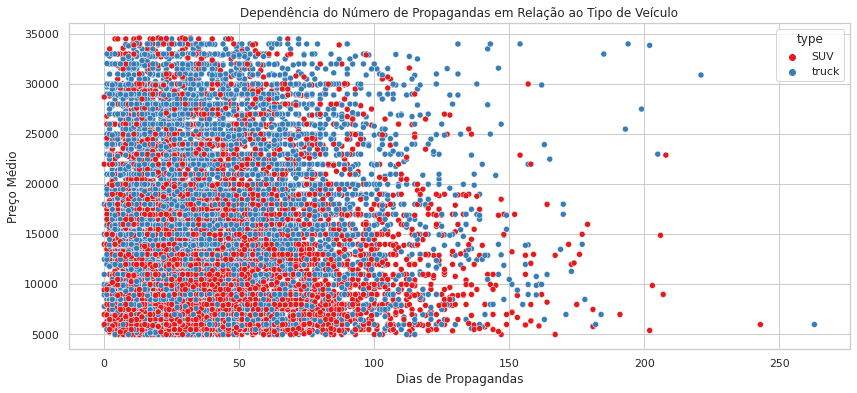

In [335]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(14, 6))
sns.scatterplot(data=top_vehicle_data, x='days_listed', y='price', hue='type', palette='Set1')
plt.title('Dependência do Número de Propagandas em Relação ao Tipo de Veículo')
plt.xlabel('Dias de Propagandas')
plt.ylabel('Preço Médio')
plt.show()

Analisando a dispersão dos tipos de veículos podemos observar que eles estão distribuídos por todo o gráfico e sua grande maioria está entre 0 e 100 dias e seus valores estão entre 0 e um pouco acima de 50000, porém em preço médio o tipo "Truck" se destaca como veículos com valores maiores, podemos notar também que houve veículos com valores baixos sendo vendidos com mais de 200 dias de propagandas indicando que nem sempre o valor mais baixo vende mais rápido, obviamente outros fatores podem influenciar como a idade do veículo ou sua condição. 

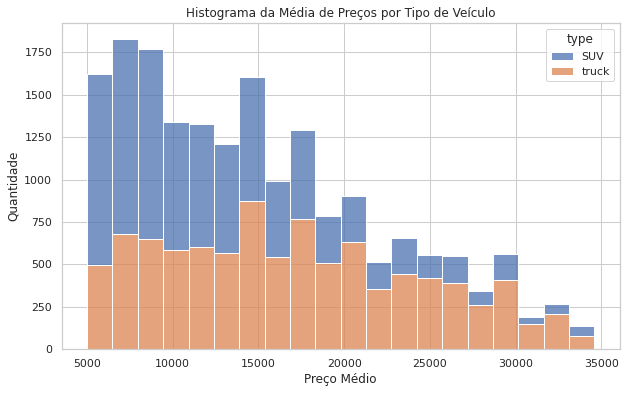

In [336]:
import matplotlib.pyplot as plt
import seaborn as sns

top_vehicle_data = sprint[sprint['type'].isin(top_vehicle_types)]

plt.figure(figsize=(10, 6))
sns.histplot(data=top_vehicle_data, x='price', hue='type', bins=20, multiple='stack')
plt.title('Histograma da Média de Preços por Tipo de Veículo')
plt.xlabel('Preço Médio')
plt.ylabel('Quantidade')
plt.show()

A análise mostra que os tipos de veículos "Truck" e "SUV" são os mais representativos em termos de quantidade de propagandas e é possível observar que a maioria dos veículos desses tipos possui preços concentrados com "Trucks" tendendo a ter preços mais elevados em comparação com "SUVs". Além disso, a distribuição de preços para ambos os tipos é assimétrica, com a maioria dos valores de preços sendo menores e uma pequena proporção tendo valores mais altos.

## Fatores de preço

In [337]:
ads = sprint.pivot_table(index='type', values='price', aggfunc=['mean', 'count'])

ads

,mean,count
,price,price
type,,
SUV,12945.398434,8812
bus,20904.500000,18
convertible,15283.035461,282
coupe,17247.845791,1485
hatchback,9032.790970,598
mini-van,10802.191341,716
offroad,15441.895062,162
other,12574.580110,181


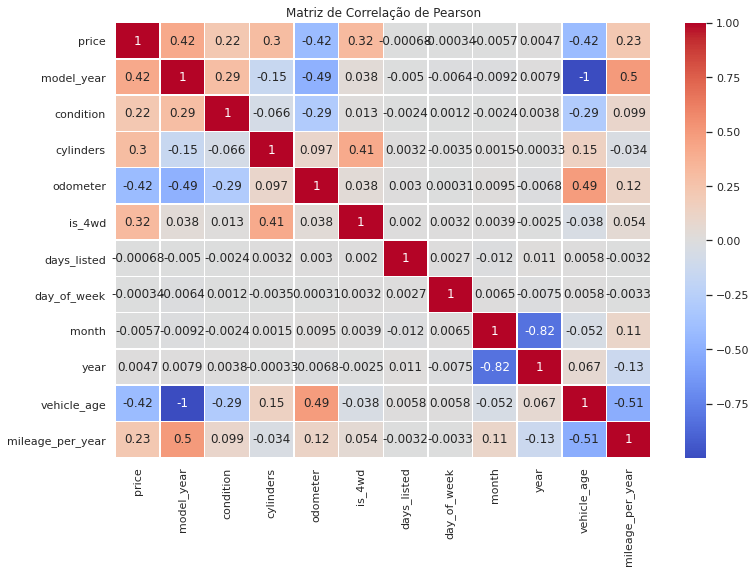

In [338]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = vehicles.corr()

sns.set(style="white")

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlação de Pearson')
plt.show()

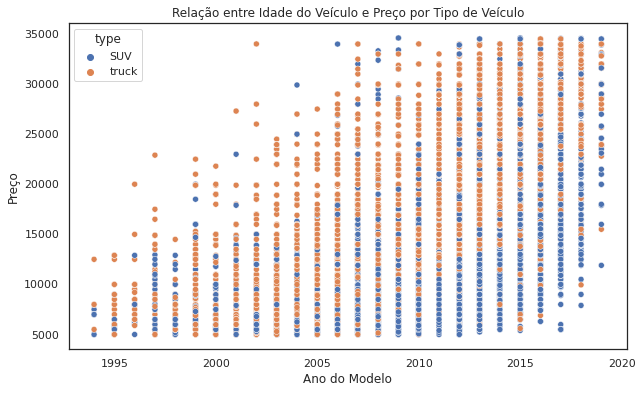

In [339]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_vehicle_data, x='model_year', y='price', hue='type')
plt.title('Relação entre Idade do Veículo e Preço por Tipo de Veículo')
plt.xlabel('Ano do Modelo')
plt.ylabel('Preço')
plt.show()



Podemos notar neste gráfico que agora há um dispersão de preço bem interessante com veículos mais antigos custando menos e com veículos mais novos com preços maiores, algo que não estava tão bem estrauturado antes definição dos limites inferiores em 25% pois havia muito veículos novos com valores extremamente baixos. 

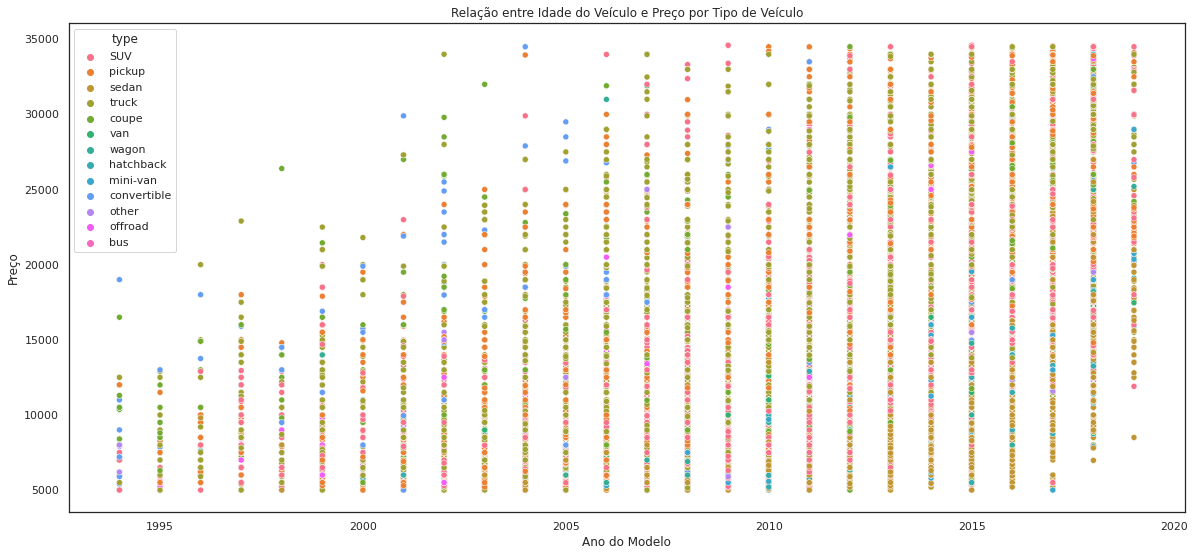

In [340]:
plt.figure(figsize=(20, 9))
sns.scatterplot(data=sprint, x='model_year', y='price', hue='type')
plt.title('Relação entre Idade do Veículo e Preço por Tipo de Veículo')
plt.xlabel('Ano do Modelo')
plt.ylabel('Preço')
plt.show()



Podemos notar o mesmo quando analisamos todos os tipos de veículos. 

In [341]:
correlation_odometer = top_vehicle_data.groupby('type')['model_year', 'price'].corr().iloc[0::2,-1]
correlation_odometer

/tmp/ipykernel_27/1131191975.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  correlation_odometer = top_vehicle_data.groupby('type')['model_year', 'price'].corr().iloc[0::2,-1]


type             
SUV    model_year    0.570597
truck  model_year    0.653350
Name: price, dtype: float64

Há uma correlação positiva moderada (0.653350) entre o ano do modelo (model_year) e o preço (price) dos veículos do tipo truck. Isso sugere que, em média, caminhões mais recentes em termos de ano do modelo tendem a ter preços mais altos.

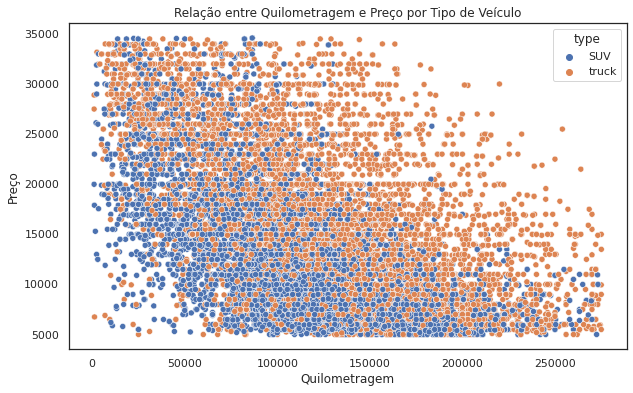

In [342]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_vehicle_data, x='odometer', y='price', hue='type')
plt.title('Relação entre Quilometragem e Preço por Tipo de Veículo')
plt.xlabel('Quilometragem')
plt.ylabel('Preço')
plt.show()



Por este gráfico podemos ter uma visualização bem clara sobre o impacto da quilometragem no preço, a média de veículos com cerca de 250000km não ultrapassa os 20000 enquanto notamos que veículos com quilometragem baixa tem valores que chegam a 35000 em média e isso mostra que sim a quilometragem tem impacto no preço, obviamente outros fatores impactam como o ano do veículo, conidção e entre outros. 

In [343]:
correlation_odometer = top_vehicle_data.groupby('type')['odometer', 'price'].corr().iloc[0::2,-1]
correlation_odometer

/tmp/ipykernel_27/3000399051.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  correlation_odometer = top_vehicle_data.groupby('type')['odometer', 'price'].corr().iloc[0::2,-1]


type           
SUV    odometer   -0.605277
truck  odometer   -0.556078
Name: price, dtype: float64

Há uma correlação negativa moderada (-0.556078) entre a quilometragem (odometer) e o preço (price) dos veículos do tipo truck. Isso sugere que, em média, à medida que a quilometragem aumenta, o preço tende a diminuir para Truck e SUV.

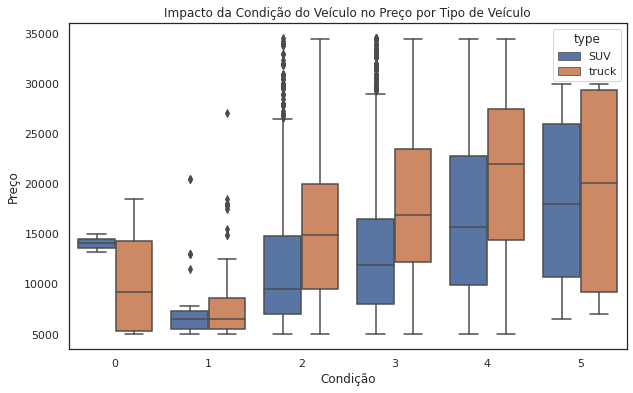

In [344]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=top_vehicle_data, x='condition', y='price', hue='type')
plt.title('Impacto da Condição do Veículo no Preço por Tipo de Veículo')
plt.xlabel('Condição')
plt.ylabel('Preço')
plt.show()


In [345]:
avg_price_by_condition = top_vehicle_data.groupby(['type', 'condition'])['price'].mean().unstack()
avg_price_by_condition

condition,0,1,2,3,4,5
type,,,,,,
SUV,14100.0,7926.774194,11513.633274,13129.404972,16598.028935,18317.181818
truck,10500.0,8066.548077,15536.813595,17807.736643,20760.064596,19233.333333


Assim como nos veículos "SUV", os veículos "truck" tem melhores condições (condição 5) tendem a ter a média de preço mais alta, seguido pelas condições 4 e 3.
Da mesma forma, à medida que a condição diminui, a média de preço tende a diminuir, indicando uma correlação negativa entre a condição e o preço. Isso sugere que veículos "truck" em melhores estados de conservação são geralmente mais valorizados no mercado.
Ambos os resultados são consistentes de que a condição do veículo desempenha um papel importante na determinação do preço médio, e veículos em melhores condições são mais propensos a ter preços mais elevados.

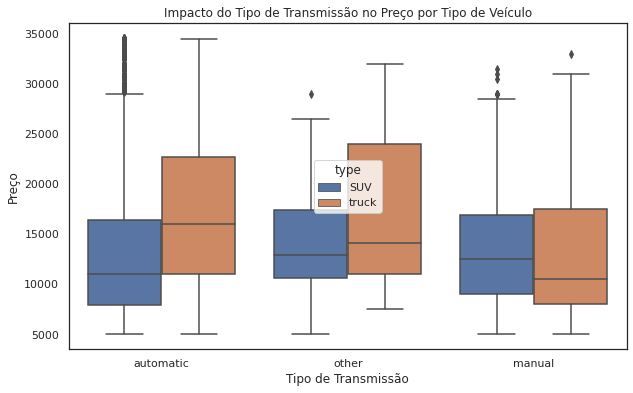

In [346]:
transmission_counts = top_vehicle_data['transmission'].value_counts()
transmission_categories = transmission_counts[transmission_counts >= 50].index


plt.figure(figsize=(10, 6))
sns.boxplot(data=top_vehicle_data[top_vehicle_data['transmission'].isin(transmission_categories)], x='transmission', y='price', hue='type')
plt.title('Impacto do Tipo de Transmissão no Preço por Tipo de Veículo')
plt.xlabel('Tipo de Transmissão')
plt.ylabel('Preço')
plt.show()

Podemos notar que a categorria SUV em grande parte fica no na mesma faixa de preço independente de sua Transmissão, obviamente que há um grande volume de valores atípiocos para veículos automáticos, para o tipo Truck a média de preço é superior a SUV e tanto para veículos automaticos como para os que estão na coluna 'other' que em sua maioria podem ser também automáticos. 

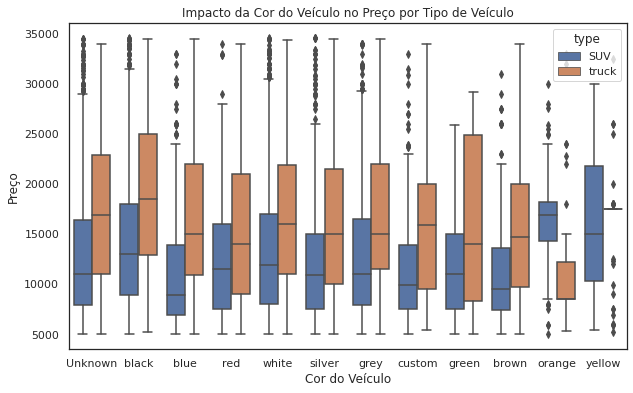

In [347]:
color_counts = top_vehicle_data['paint_color'].value_counts()
color_categories = color_counts[color_counts >= 50].index

plt.figure(figsize=(10, 6))
sns.boxplot(data=top_vehicle_data[top_vehicle_data['paint_color'].isin(color_categories)], x='paint_color', y='price', hue='type')
plt.title('Impacto da Cor do Veículo no Preço por Tipo de Veículo')
plt.xlabel('Cor do Veículo')
plt.ylabel('Preço')
plt.show()

Analisando a coluna 'paint_color' não podemos definir o impacto da cor no preço médio do veículo de forma clara pois outros fatores podem ser mais impactantes, porém, podemos notar que algumas cores tem valores menores como 'orange', 'red' e 'blue'.

## Conclusão geral


Neste projeto, realizamos uma análise detalhada de um conjunto de dados de propagandas de veículos para identificar padrões e insights importantes relacionados aos preços, tipos de veículos, quilômetragem e outras variáveis relevantes. Abordamos cada etapa do processo de análise de dados, desde a limpeza inicial até a visualização final dos resultados.

Limpeza e Pré-processamento de Dados:

Iniciamos a análise tratando valores ausentes, duplicados e inconsistentes no conjunto de dados. Utilizamos métodos e gráficos para identificar e tratar valores atípicos nas variáveis de interesse, realizamos transformações de dados, como o cálculo da idade do veículo e da quilometragem por ano.

Análise Exploratória de Dados:

Identificamos os tipos de veículos mais populares com base no número de propagandas e selecionamos os dois tipos com maior número de propagandas para análise detalhada.
Observamos a distribuição de preços, tempo de listagem e outras variáveis importantes para os tipos de veículos selecionados.
Análise de Preços e Tempo de Listagem:

Definimos propagandas "rápidas" e "longas" com base em critérios estatísticos, identificando valores fora dos quartis da distribuição de tempo de listagem.
Exploramos a relação entre o número de propagandas e o preço médio para os tipos de veículos mais populares, utilizando gráficos de dispersão e histogramas. Estudamos a correlação entre preço e diferentes variáveis, como idade do veículo, quilometragem e condição, observamos que a quilometragem e a idade do veículo têm uma correlação negativa com o preço, enquanto a condição tem uma correlação positiva e analisamos a relação entre preço e outros fatores, como tipo de transmissão e cor.